In [206]:
#Create development project location choice model
#Agents are development that happened between 2010 and 2023
#choices are developable parcels

import geopandas as gpd
import pandas as pd
import os
import pyproj
import numpy as np

mycrs=26910
state='CA'
#county='Tahoe County'
pyproj.datadir.set_data_dir(r'C:\Users\adc\anaconda3\envs\ox\Library\share\proj')

In [207]:
#get Parce 2023 landvalue and structure value data 
dataset_path = r"..\data\Data for Manhan.gdb"
Parcels = gpd.read_file(dataset_path, driver='fileGDB', layer='ParcelMaster_Redacted', ignore_geometry=False).to_crs(mycrs)
Parcels

In [ ]:
selcols=['APN',
 'PPNO',
 'COUNTY_LANDUSE_CODE',
 'COUNTY_LANDUSE_DESCRIPTION',
 'EXISTING_LANDUSE',
 'REGIONAL_LANDUSE',
 'IPES_SCORE',
 'AS_LANDVALUE',
 'AS_IMPROVALUE',
 'AS_SUM',
 'TAX_LANDVALUE',
 'TAX_IMPROVALUE',
 'TAX_SUM',
 'TAX_YEAR',
 'YEAR_BUILT',
 'UNITS',
 'BEDROOMS',
 'BATHROOMS',
 'BUILDING_SQFT',
 'ESTIMATED_COVERAGE_ALLOWED',
 'IMPERVIOUS_SURFACE_SQFT',
 'SOIL_1974',
 'SOIL_2003',
 'CATCHMENT',
 'HRA_NAME',
 'WATERSHED_NUMBER',
 'WATERSHED_NAME',
 'PRIORITY_WATERSHED',
 'FIREPD',
 'PLAN_ID',
 'PLAN_NAME',
 'ZONING_ID',
 'ZONING_DESCRIPTION',
 'TOWN_CENTER',
 'LOCATION_TO_TOWNCENTER',
 'TOLERANCE_ID',
 'TAZ',
 'INDEX_1987',
 'LITTORAL',
 'WITHIN_TRPA_BNDY',
 'LOCAL_PLAN_HYPERLINK',
 'DESIGN_GUIDELINES_HYPERLINK',
 'LTINFO_HYPERLINK',
 'PARCEL_ACRES',
 'PARCEL_SQFT',
 'WITHIN_BONUSUNIT_BNDY',
 'GlobalID',
  'PLAN_TYPE',
 'Shape_Length',
 'Shape_Area',
 'geometry']
Parcels=Parcels[selcols].copy()
Parcels.describe()

,PPNO,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,TAX_LANDVALUE,TAX_IMPROVALUE,TAX_SUM,BUILDING_SQFT,ESTIMATED_COVERAGE_ALLOWED,IMPERVIOUS_SURFACE_SQFT,WATERSHED_NUMBER,TAZ,LITTORAL,WITHIN_TRPA_BNDY,PARCEL_ACRES,PARCEL_SQFT,WITHIN_BONUSUNIT_BNDY,Shape_Length,Shape_Area
count,6.123100e+04,10896.000000,6.123100e+04,6.122900e+04,6.123100e+04,6.123100e+04,6.122900e+04,6.123000e+04,61094.000000,6.123100e+04,6.118700e+04,61231.000000,61228.000000,61231.000000,61231.000000,61231.000000,6.123100e+04,61231.000000,61231.000000,6.123100e+04
mean,1.382094e+10,697.689519,1.719273e+05,2.439741e+05,4.118386e+05,2.669511e+05,2.969932e+05,5.012708e+05,1738.635038,7.682337e+03,3.686774e+03,34.504924,139.238878,0.035293,0.982444,4.012703,1.747932e+05,0.626807,201.395161,1.624187e+04
std,4.063009e+10,256.712212,5.843673e+05,6.809014e+05,1.055628e+06,1.045496e+06,1.055601e+06,1.339769e+06,5699.517633,9.473805e+04,2.131436e+04,17.527456,84.482162,0.184520,0.131334,82.024888,3.573003e+06,0.483657,630.507568,3.319440e+05
min,7.011010e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000042,1.833065e+00,0.000000,1.716021,1.702973e-01
25%,2.320103e+07,649.000000,1.670400e+04,0.000000e+00,5.299200e+04,1.873800e+04,0.000000e+00,6.072950e+04,0.000000,2.167555e+02,4.959425e+02,17.000000,65.000000,0.000000,1.000000,0.115150,5.015897e+03,0.000000,91.596634,4.659941e+02
50%,3.335102e+07,767.000000,7.532900e+04,1.089210e+05,2.071200e+05,1.045500e+05,1.531090e+05,2.681465e+05,1320.000000,1.501813e+03,1.492528e+03,42.000000,134.000000,0.000000,1.000000,0.226335,9.859116e+03,1.000000,124.701966,9.160272e+02
75%,9.316004e+07,852.000000,1.664640e+05,3.122320e+05,4.768455e+05,2.414520e+05,3.511450e+05,5.627508e+05,2020.000000,2.629049e+03,2.647079e+03,44.000000,209.000000,0.000000,1.000000,0.325475,1.417767e+04,1.000000,155.544628,1.317294e+03
max,1.419060e+11,1043.000000,3.216606e+07,7.758222e+07,8.717022e+07,7.397625e+07,1.090273e+08,8.717022e+07,590160.000000,6.487692e+06,1.643423e+06,64.000000,297.000000,1.000000,1.000000,10847.811115,4.725307e+08,1.000000,38419.036865,4.389954e+07


In [ ]:
Parcels[['AS_LANDVALUE',
 'AS_IMPROVALUE',
 'AS_SUM',
 'TAX_LANDVALUE',
 'TAX_IMPROVALUE',
 'TAX_SUM',
 'TAX_YEAR',
 'YEAR_BUILT',
 'UNITS',
 'BEDROOMS',
 'BATHROOMS',
 'BUILDING_SQFT',
 'ESTIMATED_COVERAGE_ALLOWED',
 'IMPERVIOUS_SURFACE_SQFT',
 'SOIL_1974',
 'SOIL_2003']].dtypes

AS_LANDVALUE                    int64
AS_IMPROVALUE                 float64
AS_SUM                          int64
TAX_LANDVALUE                   int64
TAX_IMPROVALUE                float64
TAX_SUM                       float64
TAX_YEAR                       object
YEAR_BUILT                     object
UNITS                          object
BEDROOMS                       object
BATHROOMS                      object
BUILDING_SQFT                 float64
ESTIMATED_COVERAGE_ALLOWED    float64
IMPERVIOUS_SURFACE_SQFT       float64
SOIL_1974                      object
SOIL_2003                      object
dtype: object

In [ ]:
#Convert selected columns to numeric
columns_to_convert = ['UNITS','BEDROOMS', 'BATHROOMS' ]
Parcels[columns_to_convert]=Parcels[columns_to_convert].apply(pd.to_numeric, errors='coerce')
Parcels['YEAR_BUILT']=Parcels['YEAR_BUILT'].replace('N/A', 0)
Parcels['YEAR_BUILT'] = Parcels['YEAR_BUILT'].fillna(0).astype(int)

In [ ]:
#Calculate percent of improved value as total assessed value, floor to area ratio, land value per square foot, and square foot per unit
Parcels['per_AS_IMPROVALUE']=Parcels['AS_IMPROVALUE']/Parcels['AS_SUM'].map(lambda x: x if x>0 else 1) 
Parcels['FAR']=Parcels['BUILDING_SQFT']/Parcels['PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['lval_per_sqft']=Parcels['AS_LANDVALUE']/Parcels['PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['sqft_per_unit']=Parcels['BUILDING_SQFT']/Parcels['UNITS'].map(lambda x: x if x>0 else 1) 

In [ ]:
#Read water file from TRPA data portal
water_file=r"..\data\nhd_water.geojson"
water=gpd.read_file(water_file).to_crs(mycrs)

#read wetland, wood and park data obtained from OSM
wetland_file=r"..\data\osm\wetland.geojson"
wetland=gpd.read_file(wetland_file).to_crs(mycrs)
wood_file=r"..\data\osm\wood.geojson"
wood=gpd.read_file(wood_file).to_crs(mycrs)
park_file=r"..\data\osm\park.geojson"
park=gpd.read_file(park_file).to_crs(mycrs)

#Calcualte Water Body Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),water.loc[water.geometry.is_valid].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
waterinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(waterinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'water'}, inplace=True)


#Calcualte Wetland Body Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),wetland.loc[wetland.type.isin(['MultiPolygon','Polygon'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
wetlandinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(wetlandinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'wetland'}, inplace=True)

#Calcualte Wood Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),wood.loc[wood.type.isin(['MultiPolygon','Polygon'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
woodinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(woodinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'wood'}, inplace=True)

#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),park.loc[park.geometry.is_valid].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
parkinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(parkinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'park'}, inplace=True)

Parcels[['water','wood','wetland','park']]=Parcels[['water','wood','wetland','park']].fillna(0)

<Axes: >

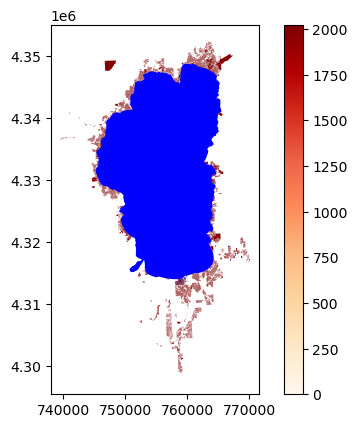

In [ ]:
ax=water.loc[water.GNIS_Name=='Lake Tahoe'].plot(color='blue')
Parcels.loc[(Parcels.BUILDING_SQFT>0)].plot(column='YEAR_BUILT', cmap='OrRd', ax=ax, legend=True)

<Axes: ylabel='Frequency'>

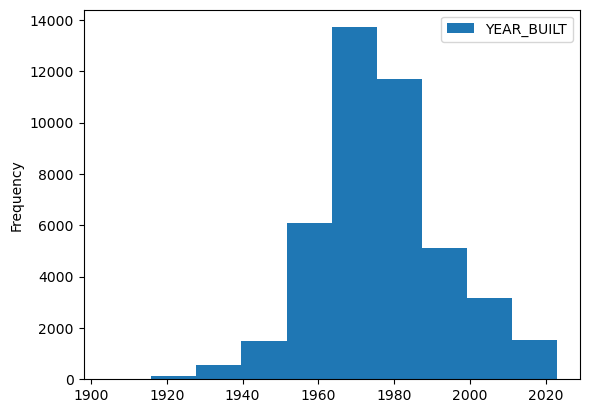

In [ ]:
Parcels.loc[Parcels.YEAR_BUILT>1900,['YEAR_BUILT']].plot.hist(bins=10)

In [ ]:
Parcels['dist2tahoe'] = Parcels.apply(lambda r: r.geometry.distance(water.loc[water.GNIS_Name=='Lake Tahoe'].geometry), axis=1)


<Axes: >

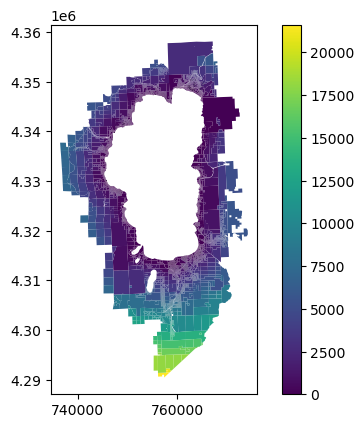

In [ ]:
Parcels.plot(column='dist2tahoe', legend=True)

In [ ]:
#read in land capability file from TRPA data portal
bailey_file=r"..\Data\landcapability_bailey.geojson"
bailey=gpd.read_file(bailey_file).to_crs(mycrs)
#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),bailey.loc[bailey.CAPABILITY=='3'].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
bailey3inparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(bailey3inparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'bailey3area'}, inplace=True)

#Calcualte Park Size in each Parcel
o_gdf=gpd.overlay(Parcels.to_crs(mycrs),bailey.loc[bailey.CAPABILITY.isin(['4','5','6','7'])].dissolve().explode(index_parts=True), how='intersection')
o_gdf['o_area']=o_gdf.geometry.area
bailey4pinparcel=o_gdf.groupby('APN')['o_area'].sum()
Parcels=Parcels.merge(bailey4pinparcel, on='APN', how='left')
Parcels.rename(columns={'o_area':'bailey4parea'}, inplace=True)

In [ ]:
#Read in multifamily data with density from TRPA data portal
mutlifamz_file=r"..\Data\areas_zoned_multifamily.geojson"
mutlifamz=gpd.read_file(mutlifamz_file).to_crs(mycrs)
mutlifamz.loc[mutlifamz.UNIT.isin(['people per acre', 'persons per acre']),'DENSITY']



51    25
71    15
Name: DENSITY, dtype: object

<Axes: ylabel='Frequency'>

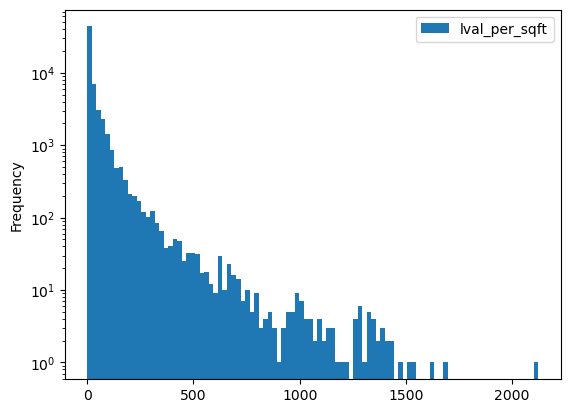

In [ ]:
Parcels[['lval_per_sqft']].plot.hist(log=True, bins=100)

<Axes: >

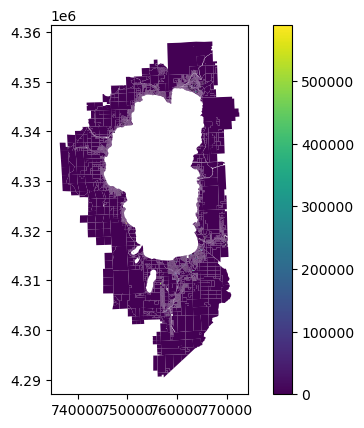

In [ ]:
Parcels.plot('sqft_per_unit', legend=True)

In [ ]:
#create a centroid geometry to faciliate the join to parcel with multifamily zone
Parcels.loc[:,'centroid']=Parcels.geometry.centroid
Parcels.loc[:,'polygeom']=Parcels.geometry
Parcels.set_geometry('centroid', inplace=True)
Parcels=Parcels.sjoin(mutlifamz[['DENSITY', 'UNIT','geometry']], how='left', predicate='within')
Parcels.drop(columns=['index_right'], inplace=True)
Parcels.rename(columns={'index_left':'index', 'UNIT':'DENSITYUNIT'}, inplace=True)

In [ ]:
import osmnx as ox
bnds=Parcels.to_crs(4326).total_bounds
mybbox=(bnds[3],bnds[1],bnds[2],bnds[0])
#Get OSM network for driving for the TRPA area
G = ox.graph_from_bbox(bbox=mybbox, network_type="drive")
G=ox.projection.project_graph(G, to_crs=mycrs)

#Create simplifed network and merge nodes within 5 meters together to avoid overcounting of intersections. 
#remove dead_ends to only count intersections with degree 2 or more
G_simplified=ox.simplification.consolidate_intersections(
    G,
    tolerance=5,
    rebuild_graph=True,
    dead_ends=False,
    reconnect_edges=True
)

nodes_s,edges_s=ox.graph_to_gdfs(G_simplified)


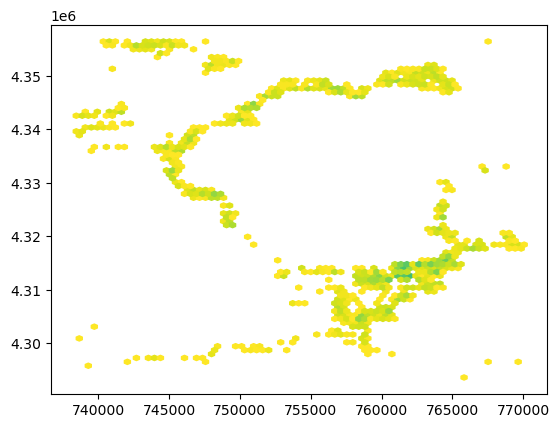

In [ ]:
import matplotlib.pyplot as plt
from shapely.geometry import Polygon
import numpy as np
def polygons_from_hexbins(collection):
    hex_polys=collection.get_paths()[0].vertices
    hex_array=[]
    for xs, ys in collection.get_offsets():
        hex_x=np.add(hex_polys[:,0], xs)
        hex_y=np.add(hex_polys[:,1], ys)
        hex_array.append(Polygon(np.vstack([hex_x, hex_y]).T))
        
    counts=collection.get_array()
    return gpd.GeoDataFrame({'count': counts, 'geometry':hex_array})
        
cmap='viridis_r'
collection=plt.hexbin(x=nodes_s['x'], y=nodes_s['y'], gridsize=75, cmap=cmap, mincnt=1,  vmax=100)
        
hex_gdf=polygons_from_hexbins(collection).set_crs(mycrs)
hex_gdf.to_file(r'hex_gdf_intersectioncounts.geojson', driver='GeoJSON')



<Axes: >

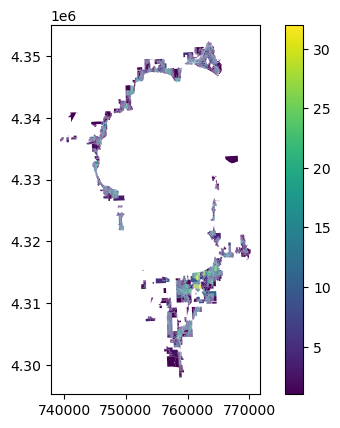

In [ ]:
Parcels=Parcels.sjoin(hex_gdf, how='left', predicate='within')
Parcels.drop(columns=['index_right'], inplace=True)
Parcels.rename(columns={'index_left':'index', 'count':'cnt_intersections'}, inplace=True)
  

Parcels.drop(columns=['centroid'], inplace=True)
Parcels.set_geometry('polygeom', inplace=True)
Parcels.plot('cnt_intersections', legend=True)

<Axes: >

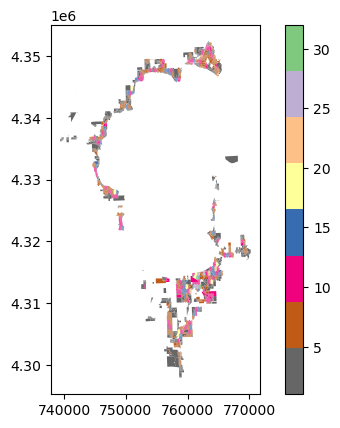

In [ ]:
Parcels.plot('cnt_intersections',cmap='Accent_r', legend=True)

In [ ]:
#create dummy variable to indicate whether parcel is located in developable bailey 3 or 4, 5, 6, 7 zones
Parcels.loc[:,'isbailey4p']=0
Parcels.loc[:,'isbailey3']=0
Parcels.loc[Parcels.bailey4parea>Parcels.Shape_Area*0.8, 'isbailey4p']=1
Parcels.loc[Parcels.bailey3area>Parcels.Shape_Area*0.8, 'isbailey3']=1
Parcels.loc[:,'DENSITY']=Parcels.DENSITY.astype('d')
Parcels.loc[:,'usableland']=Parcels.apply(lambda r: r['PARCEL_SQFT']-10.7639104*(r['water']+r['wood']+r['park']+r['wetland']), axis=1)
Parcels.loc[:,'Acres10p']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x>=435600 else 0)
Parcels.loc[:,'Acres5to10']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x>=267800 and x<435600 else 0)
Parcels.loc[:,'Acres1to5']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<267800 and x>=43560 else 0)
Parcels.loc[:,'Acreshalfto1acres']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<43560 and x>=26780 else 0)
Parcels.loc[:,'Acresquartertohalfacres']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<26780 and x>=13390 else 0)
Parcels.loc[:,'Acreslt4000sqft']=Parcels.loc[:,'usableland'].map(lambda x: 1 if x<4000 else 0)

Parcels.loc[:,'DUA']=Parcels.loc[:,'UNITS']*43560.0/Parcels.loc[:,'usableland']
Parcels.loc[(Parcels.DUA>Parcels.DENSITY) | (Parcels.DENSITY.isnull()) ,'DENSITY']=Parcels.loc[(Parcels.DUA>Parcels.DENSITY) | (Parcels.DENSITY.isnull()), 'DUA']
Parcels.loc[:, 'cnt_intersections_n']=Parcels.loc[:, 'cnt_intersections']/Parcels.loc[:, 'cnt_intersections'].max()
Parcels.loc[:, 'dist2tahoe_n']=Parcels.loc[:, 'dist2tahoe']/Parcels.loc[:, 'dist2tahoe'].max()

c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\pandas\core\computation\expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)


<Axes: >

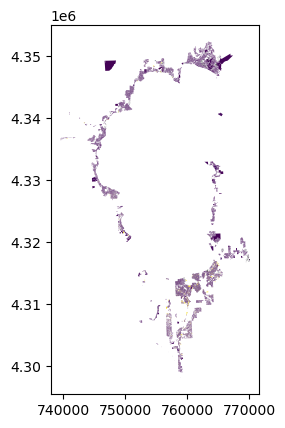

In [ ]:
Parcels.loc[(Parcels.YEAR_BUILT<=2010) & (Parcels.BUILDING_SQFT>0), 'bldage']=Parcels.loc[(Parcels.YEAR_BUILT<=2010) & (Parcels.BUILDING_SQFT>0),'YEAR_BUILT'].map(lambda x: 2010-x)
Parcels.loc[(Parcels.YEAR_BUILT<=2010) & (Parcels.BUILDING_SQFT>0)].plot(column='bldage')

In [ ]:
#Get 9 neibors
import numpy as np
from sklearn.neighbors import BallTree
k=8
# the formula to calculate radiant required by haversine
Parcels['lat_rad'] = np.deg2rad(Parcels.geometry.centroid.to_crs(4326).y)
Parcels['lon_rad'] = np.deg2rad(Parcels.geometry.centroid.to_crs(4326).x)

ball_tree = BallTree(Parcels[["lat_rad", "lon_rad"]], metric="haversine")

neighbors = ball_tree.query(
    Parcels[["lat_rad", "lon_rad"]],
    k=(
        k + 1
    ),  # k + 1 because we remove the address itself later, hence we need k - 1 = k_desired
    return_distance=False,  
    sort_results=True,
)

neighbors

array([[    0,     1,     5, ...,    25,    23,    24],
       [    1,     0,     5, ...,  4840,  4841,  4842],
       [    2,     4,     3, ...,     7,     8,    41],
       ...,
       [61228, 16788, 61224, ..., 16199, 16235, 12673],
       [61229, 15002, 15067, ..., 15068, 15000, 61227],
       [61230, 16310, 11699, ..., 11697, 11698, 15803]], dtype=int64)

In [ ]:
# Save to an NPY file
np.save('../data/neighbors.npy', neighbors)


In [ ]:
nei_parcel = pd.DataFrame(index=Parcels.index)
ncols=['neighbors_PARCEL_SQFT','neighbors_usableland','neighbors_age','neighbors_totalunits','neighbors_BUILDING_SQFT','neighbors_AS_SUM','neighbors_AS_IMPROVALUE','neighbors_AS_LANDVALUE','neighbors_per_built']
for c in ncols:
   nei_parcel[c]=None

In [ ]:
# remove the address/point itself from the array because it itself is its nearest neighbour
neighbors = neighbors[:, 1:]
#calculate neiboring parcels total land sqft
nei_parcel['neighbors_PARCEL_SQFT']= [
    Parcels['PARCEL_SQFT'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels totalusable land sqft
nei_parcel['neighbors_usableland']= [
    Parcels['usableland'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels total building ages
nei_parcel['neighbors_age']= [
    Parcels['bldage'].iloc[n].sum() for n in neighbors
]


In [ ]:
Parcels.loc[:, 'AS_SUM_nonew']=Parcels.apply(lambda r: r.AS_LANDVALUE if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.AS_SUM, axis=1)

#calculate neiboring parcels total value as_sum
nei_parcel['neighbors_AS_SUM']= [
    Parcels['AS_SUM_nonew'].iloc[n].sum() for n in neighbors
]

Parcels.drop(columns=['AS_SUM_nonew'], inplace=True)

#calculate neiboring parcels assessed land value
nei_parcel['neighbors_AS_LANDVALUE']= [
    Parcels['AS_LANDVALUE'].iloc[n].sum() for n in neighbors
]

Parcels.loc[:, 'BUILDING_SQFT_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.BUILDING_SQFT, axis=1)

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_BUILDING_SQFT']= [
    Parcels['BUILDING_SQFT_nonew'].iloc[n].sum() for n in neighbors
]


Parcels.loc[:, 'AS_IMPROVALUE_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.AS_IMPROVALUE, axis=1)

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_AS_IMPROVALUE']= [
    Parcels['AS_IMPROVALUE_nonew'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels percent with building_sqft>0
nei_parcel['neighbors_per_built']= [
   Parcels['BUILDING_SQFT_nonew'].iloc[n].map(lambda x: 1 if x>0 else 0).sum()/8.0 for n in neighbors
]

Parcels.drop(columns=['BUILDING_SQFT_nonew'], inplace=True)
Parcels.drop(columns=['AS_IMPROVALUE_nonew'], inplace=True)


Parcels.loc[:, 'UNITS_nonew']=Parcels.apply(lambda r: 0 if (r.YEAR_BUILT>2010 and r.BUILDING_SQFT>0) else r.UNITS, axis=1)


#calculate neiboring parcels total units
nei_parcel['neighbors_totalunits']= [
   Parcels['UNITS_nonew'].iloc[n].sum() for n in neighbors
]

Parcels.drop(columns=['UNITS_nonew'], inplace=True)

In [ ]:
#calculate neighboring parcels average percentage of improved value and FAR ratio
nei_parcel['neighbors_per_AS_IMPROVALUE']=nei_parcel['neighbors_AS_IMPROVALUE']/nei_parcel['neighbors_AS_SUM'].map(lambda x: x if x>0 else 1) 
nei_parcel['neighbors_FAR']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
nei_parcel['neighbors_lval_per_sqft']=nei_parcel['neighbors_AS_LANDVALUE']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)
nei_parcel['neighbors_bldsqft_per_unit']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_totalunits'].map(lambda x: x if x>0 else 1)
nei_parcel['neighbors_unit_per_acre']=nei_parcel['neighbors_totalunits']*43560.0/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)


In [ ]:
Parcels = pd.concat([Parcels, nei_parcel[['neighbors_per_AS_IMPROVALUE','neighbors_FAR','neighbors_age','neighbors_per_built','neighbors_lval_per_sqft','neighbors_bldsqft_per_unit','neighbors_unit_per_acre']]], axis=1)
Parcels

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,bldage,lat_rad,lon_rad,neighbors_per_AS_IMPROVALUE,neighbors_FAR,neighbors_age,neighbors_per_built,neighbors_lval_per_sqft,neighbors_bldsqft_per_unit,neighbors_unit_per_acre
0,048-041-03,4.804103e+06,140,"Vacant, commercial",Open Space,,NaN,3309,0.0,3309,...,NaN,0.686322,-2.093423,0.000168,0.000000,0.0,0.000,0.055981,0.000000,0.000000
1,048-041-20,4.804120e+06,120,"Vacant, single family",Open Space,,NaN,25891687,0.0,25891687,...,NaN,0.686029,-2.093758,0.022006,0.000050,29.0,0.125,0.065134,2706.000000,0.000803
2,048-042-02,4.804202e+06,100,"Vacant, other or unknown",Open Space,,NaN,2014352,5330.0,2019682,...,NaN,0.685863,-2.092817,0.000000,0.000000,0.0,0.000,0.060802,0.000000,0.000000
3,048-042-03,4.804203e+06,120,"Vacant, single family",Open Space,Conservation,NaN,261641,0.0,261641,...,NaN,0.685774,-2.093031,0.000719,0.000000,0.0,0.000,0.060147,0.000000,0.000000
4,048-140-03,4.814003e+06,120,"Vacant, single family",Vacant,Conservation,NaN,602455,0.0,602455,...,NaN,0.685892,-2.093033,0.000754,0.000000,0.0,0.000,0.055343,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61226,1318-10-310-096,1.318103e+11,200,None,Single Family Residential,Residential,NaN,721000,507778.0,1228778,...,NaN,0.680753,-2.093522,0.167989,0.200438,271.0,0.750,51.953133,2296.666667,3.801630
61227,1318-10-310-097,1.318103e+11,270,None,Condominium Common Area,Residential,NaN,0,0.0,0,...,NaN,0.680748,-2.093546,0.129317,0.142702,252.0,0.625,63.926082,1541.777778,4.031786
61228,1318-10-417-055,1.318104e+11,200,None,Single Family Residential,Residential,NaN,253750,224817.0,478567,...,NaN,0.680675,-2.093585,0.451738,0.236375,179.0,0.750,15.443252,3205.333333,3.212295
61229,1318-10-310-094,1.318103e+11,200,None,Single Family Residential,Residential,NaN,966000,44566.0,1010566,...,NaN,0.680738,-2.093542,0.160506,0.077414,325.0,0.750,25.593903,1404.300000,2.401315


In [ ]:
Parcels['IPES_SCORE_n']=Parcels['IPES_SCORE']/Parcels['IPES_SCORE'].max()
Parcels['lval_per_sqft_n']=np.log(Parcels['lval_per_sqft'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['lval_per_sqft'].max())
Parcels['neighbors_lval_per_sqft_n']=np.log(Parcels['neighbors_lval_per_sqft'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_lval_per_sqft'].max())
Parcels['neighbors_bldsqft_per_unit_n']=np.log(Parcels['neighbors_bldsqft_per_unit'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_bldsqft_per_unit'].max())
Parcels['neighbors_age_n']=Parcels['neighbors_age']/(Parcels['neighbors_per_built'].map(lambda x: 1 if (x==0) | (x is None) else x)*8)
Parcels['neighbors_age_n']=Parcels['neighbors_age_n']/Parcels['neighbors_age_n'].max()

    

In [ ]:
#Read in SLD data
SLD=pd.read_csv(r'..\data\SLD_CA_NV.csv')
SLD

,OBJECTID,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,...,Com_VMT_Per_Worker,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area
0,31441,60530111013,60530111013,6,53,11101,3,NaN,NaN,41500.0,...,11.637535,15.235278,9.558585,44.831893,19.442039,13.574633,3529.404532,83.906547,5061.505510,1.400314e+06
1,31442,60530111022,60530111022,6,53,11102,2,NaN,NaN,41500.0,...,10.315683,14.303550,9.558585,44.831893,19.442039,12.744463,3313.560384,86.548001,7248.395767,1.451665e+06
2,31443,60971513084,60971513084,6,97,151308,4,488.0,"San Jose-San Francisco-Oakland, CA",42220.0,...,36.685037,41.271266,18.791349,72.049792,39.609060,36.772698,9560.901540,57.790885,2700.963896,2.716912e+05
3,31444,60510001022,60510001022,6,51,102,2,NaN,NaN,NaN,...,7.491844,14.150092,10.231154,33.306664,17.789688,12.607732,3278.010232,83.016896,126451.935344,4.334090e+08
4,31445,60971513092,60971513092,6,97,151309,2,488.0,"San Jose-San Francisco-Oakland, CA",42220.0,...,45.213616,51.520496,18.791349,72.049792,39.609060,45.904762,11935.238176,38.546556,7055.254272,2.306910e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25043,140138,320030033071,320030033071,32,3,3307,1,332.0,"Las Vegas-Henderson, NV",29820.0,...,12.264828,16.381438,12.094590,47.415950,17.321916,14.595861,3794.923967,87.863298,4965.669281,1.366080e+06
25044,140139,320030036243,320030036243,32,3,3624,3,332.0,"Las Vegas-Henderson, NV",29820.0,...,11.213957,16.070606,12.094590,47.415950,17.321916,14.318910,3722.916605,88.743310,4844.225937,1.324014e+06
25045,140140,320030072002,320030072002,32,3,7200,2,332.0,"Las Vegas-Henderson, NV",29820.0,...,33.633103,40.400111,12.094590,47.415950,17.321916,35.996499,9359.089765,19.862878,14995.733706,7.085136e+06
25046,140141,320079507023,320079507023,32,7,950702,3,NaN,NaN,21220.0,...,12.637748,21.036014,12.596152,39.238265,18.721111,18.743088,4873.202929,68.321351,65420.478397,1.478966e+08


<Axes: >

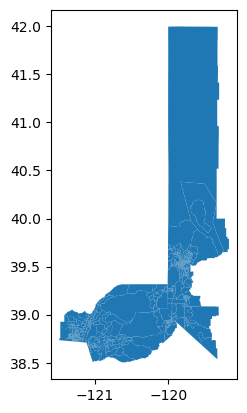

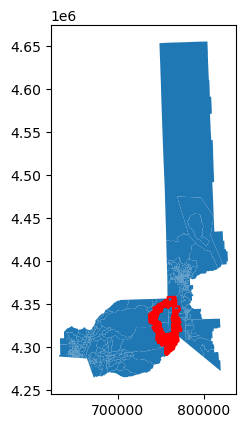

In [ ]:
bg_fname="../data/bg_gdf.geojson"

if (os.path.isfile(bg_fname)):
    bg_gdf=gpd.read_file(bg_fname)
else:
    #Get Blockgroups for TRPA
    from urllib.parse import quote
    cntys=['06017', '06061', '32031','32510','32005']
    baseurl="https://tigerweb.geo.census.gov/arcgis/rest/services/TIGERweb/tigerWMS_ACS2019/MapServer/10/query?"
    bgs=[]
    for c in cntys:
        url=baseurl+"where="+quote("STATE='{}' and COUNTY='{}'".format(c[:2],c[2:]))+"&outFields=*&returnGeometry=true&outSR=EPSG:4326&sqlFormat=none&f=geojson"
        print(url)
        mygdf=gpd.read_file(url)
        bgs.append(mygdf)
    bg_gdf=gpd.pd.concat(bgs, ignore_index=True)
    bg_gdf.to_file(bg_fname, driver='GeoJSON')
bg_gdf.plot()
ax=bg_gdf.to_crs(mycrs).plot()
Parcels.boundary.plot(color='red', ax=ax)

In [ ]:
SLD[SLD.columns[11:-2]].select_dtypes(['object']).columns
SLD.columns.tolist().index('Region')
SLD.columns[115]

'Region'

In [ ]:
selcols=SLD.columns[11:114].to_list()+SLD.columns[116:-2].to_list()
SLD[selcols]
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, thresh=3):
  #Calculates VIF for each feature in the dataframe and returns a list of features with VIF below a threshold.
  
  columns = list(df.columns)
  vif = [variance_inflation_factor(df[columns].values, i) for i in range(len(columns))]
  print(vif)
  low_collinearity_features = [columns[i] for i, v in enumerate(vif) if v <= thresh]
  return low_collinearity_features

low_vif_features = calculate_vif(SLD[selcols].fillna(0).copy())  # Avoid modifying the original dataframe
low_vif_features


c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)
c:\Users\adc\anaconda3\envs\ox\Lib\site-packages\statsmodels\stats\out

[113414.22911178472, 28138.129684965395, 237003.34123100174, inf, inf, inf, 1.878627169106998, 81.91037540721216, 21.622131080584214, inf, 1.6835247434821026, inf, 7.872028007446724, inf, 10.143316973449531, inf, 14.430639430999259, inf, inf, inf, inf, 4.985751836243402, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 295.7888740733061, inf, 11.901077661051819, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 2.0542501391557493, 1.2110314243836957, 10.835208931922613, 18.117408484691175, 10.088381101807494, 45.388463712059874, 113.08179795452821, 66.6913092011479, 62.39540886233252, 3.2859295812157736, 5.14291001239085, 9.219030996618136, 1.7187744374873326, 9.677912701810898, inf, inf, inf, inf, inf, 2.284479479393365, inf, inf, inf, inf, 455020.8300099113, 8.718271520497032, 3.2795273739574444, 52489725.159581624, 127756.08284892773, 50052680.321147345, 226.52416756000238, 259.56912314128533, 49.54588979237761, 46.3498716

['Ac_Unpr',
 'P_WrkAge',
 'D1_FLAG',
 'D2A_JPHH',
 'D2A_WRKEMP',
 'D3BAO',
 'd5dei_1',
 'B_C_male',
 'C_R_Male']

In [ ]:
#drop columns with less than 1% variance
variance =SLD[selcols].replace([np.inf, -np.inf,np.nan], 0).var()

X_cols_n = [ ]

for i in range(0,len(variance)):
    if variance.iloc[i]>=0.01: #setting the threshold as 1%
        X_cols_n.append(selcols[i])
X_cols_n

['CBSA_POP',
 'CBSA_EMP',
 'CBSA_WRK',
 'Ac_Total',
 'Ac_Water',
 'Ac_Land',
 'Ac_Unpr',
 'TotPop',
 'CountHU',
 'HH',
 'P_WrkAge',
 'AutoOwn0',
 'AutoOwn1',
 'Pct_AO1',
 'AutoOwn2p',
 'Pct_AO2p',
 'Workers',
 'R_LowWageWk',
 'R_MedWageWk',
 'R_HiWageWk',
 'TotEmp',
 'E5_Ret',
 'E5_Off',
 'E5_Ind',
 'E5_Svc',
 'E5_Ent',
 'E8_Ret',
 'E8_off',
 'E8_Ind',
 'E8_Svc',
 'E8_Ent',
 'E8_Ed',
 'E8_Hlth',
 'E8_Pub',
 'E_LowWageWk',
 'E_MedWageWk',
 'E_HiWageWk',
 'E_PctLowWage',
 'D1A',
 'D1B',
 'D1C',
 'D1C5_RET',
 'D1C5_OFF',
 'D1C5_IND',
 'D1C5_SVC',
 'D1C5_ENT',
 'D1C8_RET',
 'D1C8_OFF',
 'D1C8_IND',
 'D1C8_SVC',
 'D1C8_ENT',
 'D1C8_ED',
 'D1C8_HLTH',
 'D1C8_PUB',
 'D1D',
 'D2A_JPHH',
 'D2B_E5MIX',
 'D2B_E5MIXA',
 'D2B_E8MIX',
 'D2B_E8MIXA',
 'D2A_EPHHM',
 'D2C_TRPMX1',
 'D2C_TRPMX2',
 'D2C_TRIPEQ',
 'D2R_JOBPOP',
 'D2R_WRKEMP',
 'D2A_WRKEMP',
 'D2C_WREMLX',
 'D3A',
 'D3AAO',
 'D3AMM',
 'D3APO',
 'D3B',
 'D3BAO',
 'D3BMM3',
 'D3BMM4',
 'D3BPO3',
 'D3BPO4',
 'D4A',
 'D4B025',
 'D4B050',
 'D4C

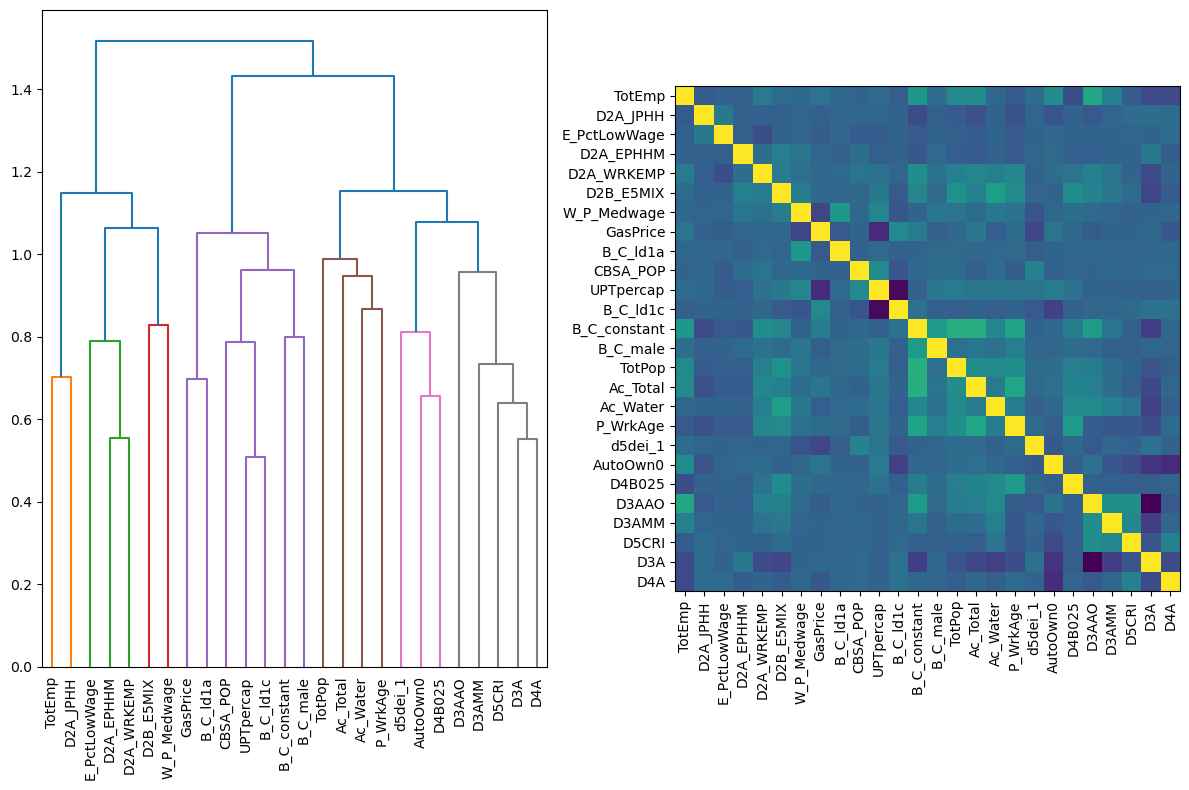

In [ ]:
#Remove highly correlated features
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

corr=SLD[X_cols_n].corr()

corr_triu=corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
to_drop = [col for col in corr_triu.columns if any(corr_triu[col].abs() > 0.5)]
sel_variables=[c for c in X_cols_n if c not in to_drop]

# feature selection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8)) 

#create corr matrix between all possible columns
# Ensure the correlation matrix is symmetric
corr=SLD[sel_variables].corr()
corr=np.asmatrix(corr.to_numpy())
corr = (corr + corr.T) / 2
#np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)


dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=sel_variables, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

try:
  ax2.imshow(corr[dendro_idx, :][:, dendro_idx])
  ax2.set_xticks(dendro_idx)
  ax2.set_yticks(dendro_idx)
except Exception:
  # Handle potential MultiIndex indexing error here
  pass  # Replace with appropriate error handling
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [ ]:
len(sel_variables)
SLD[sel_variables].max()

CBSA_POP        1.326223e+07
Ac_Total        4.146526e+06
Ac_Water        5.944301e+05
TotPop          3.893200e+04
P_WrkAge        1.000000e+00
AutoOwn0        1.710000e+03
TotEmp          1.343570e+05
E_PctLowWage    1.000000e+00
D2A_JPHH        1.862889e+03
D2B_E5MIX       1.000000e+00
D2A_EPHHM       1.000000e+00
D2A_WRKEMP      8.860000e+02
D3A             1.668945e+02
D3AAO           4.784798e+01
D3AMM           4.405929e+01
D4A             1.207000e+03
D4B025          1.000000e+00
D5CRI           1.000000e+00
W_P_Medwage     1.000000e+00
GasPrice        3.420000e+02
d5dei_1         1.000000e+00
UPTpercap       9.800000e+01
B_C_constant    9.284822e+00
B_C_male        3.690120e-01
B_C_ld1c        2.957690e-01
B_C_ld1a        1.357932e+00
dtype: float64

In [ ]:
# Deal with negative values in transit access
SLD["D5AR"] = SLD["D5AR"].clip(lower=0)
SLD["D5BR"] = SLD["D5BR"].clip(lower=0)

# Normalize SLD variables
SLD["is_MPO"] = SLD["CBSA_POP"].map(lambda x: 1 if x>=50000 else 0)
SLD["is_TMA"] = SLD["CBSA_POP"].map(lambda x: 1 if x>=200000 else 0)
SLD["hu_density_n"] = SLD["D1A"]/SLD["D1A"].max()
SLD["pop_density_n"] = SLD["D1B"]/SLD["D1B"].max()
SLD["job_density_n"] = SLD["D1C"]/SLD["D1C"].max()
SLD["jph_balance_n"] = SLD["D2A_JPHH"]/SLD["D2A_JPHH"].max()
SLD["emp_entropy"] = SLD["D2B_E5MIX"]
SLD["mix_entropy"] = SLD["D2A_EPHHM"]
SLD["wrkperjob_n"] = SLD["D2A_WRKEMP"]/SLD["D2A_WRKEMP"].max()
SLD["dist2stop_n"] = SLD["D4A"]/SLD["D4A"].max()
SLD["stop_025mi"] = SLD["D4B025"]
SLD["stop_050mi"] = SLD["D4B050"]
SLD["NatWalkInd_n"] = SLD["NatWalkInd"]/SLD["NatWalkInd"].max()
SLD["job_auto45_n"]= SLD["D5AR"]/SLD["D5AR"].max()
SLD["wrk_auto45_n"]= SLD["D5AE"]/SLD["D5AE"].max()
SLD["job_tran45_n"]= SLD["D5BR"]/SLD["D5BR"].max()
SLD["wrk_tran45_n"]= SLD["D5BE"]/SLD["D5BE"].max()
SLD["network_density_n"]= SLD["D3A"]/SLD["D3A"].max()
SLD["network_densityaao_n"]= SLD["D3AAO"]/SLD["D3AAO"].max()
SLD["network_densityamm_n"]= SLD["D3AMM"]/SLD["D3AMM"].max()
SLD["intersection_density_n"]= SLD["D3B"]/SLD["D3B"].max()
SLD["intersection_densityao_n"]= SLD["D3BAO"]/SLD["D3BAO"].max()
SLD["Per_AO0"]=1-SLD["Pct_AO2p"]-SLD["Pct_AO1"]

#selcols=["GEOID10","GEOID20", "is_MPO", "is_TMA", "hu_density_n", "pop_density_n", "job_density_n", "jph_balance_n", "emp_entropy", "mix_entropy", "dist2stop_n", "stop_025mi", "stop_050mi", "NatWalkInd_n","job_auto45_n",\
        # "wrk_auto45_n", "job_tran45_n", "wrk_tran45_n", "network_density_n", "network_densityaao_n", "network_densityamm_n", "intersection_density_n",  "Per_AO0", "d5dei_1", "D5CRI", 'P_WrkAge']

selcols=["GEOID10","GEOID20",  "jph_balance_n","network_densityaao_n",  "Per_AO0", "d5dei_1", 'P_WrkAge']

<Axes: >

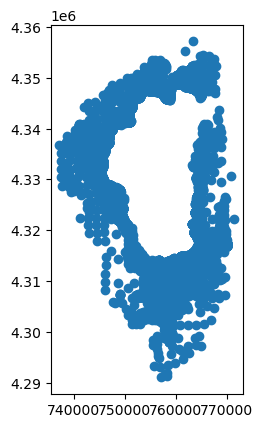

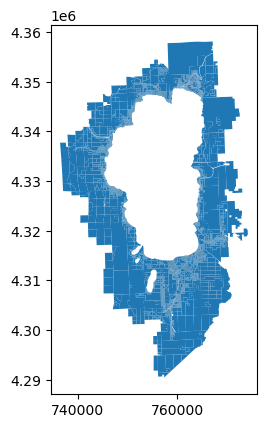

In [ ]:
SLD['GEOID10']=SLD['GEOID10'].map(lambda x: str(x).zfill(12))
bg_gdf=bg_gdf.merge(SLD[selcols], left_on='GEOID', right_on='GEOID10').to_crs(mycrs)
Parcels['centroid']=Parcels.geometry.centroid
Parcels['polygeom']=Parcels.geometry
Parcels.set_geometry('centroid', inplace=True)
Parcels.plot()
Parcels=Parcels.sjoin(bg_gdf, predicate='within', how='left')
Parcels.set_geometry('polygeom', inplace=True)
Parcels.plot()

In [ ]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df, thresh=3):
  #Calculates VIF for each feature in the dataframe and returns a list of features with VIF below a threshold.
  
  columns = list(df.columns)
  vif = [variance_inflation_factor(df[columns].values, i) for i in range(len(columns))]
  print(vif)
  low_collinearity_features = [columns[i] for i, v in enumerate(vif) if v <= thresh]
  return low_collinearity_features

sel_variables=['lval_per_sqft_n', 'neighbors_per_AS_IMPROVALUE','neighbors_age_n',
               'neighbors_FAR','neighbors_per_built','neighbors_lval_per_sqft_n','neighbors_bldsqft_per_unit_n',
         'WITHIN_TRPA_BNDY','cnt_intersections_n','isbailey4p', 'isbailey3', 'is_towncenter', 
               'is_outsidebuffer', 'IPES_SCORE_n','dist2tahoe_n', 'Acres10p', 'Acreslt4000sqft' ]+selcols[2:]

low_vif_features = calculate_vif(Parcels[sel_variables].fillna(0).copy())  # Avoid modifying the original dataframe
low_vif_features

[4.363929732647531, 1.0037825659900779, 1.4914767892586993, 3.340217482156932, 16.847314124656037, 10.127000249725564, 25.985384606776435, 46.34225974964319, 3.576138259065368, 3.404656888602654, 1.2685640649292704, 1.2732677974063202, 5.238213439177401, 1.280635070805386, 2.63145254222582, 1.1663031496050582, 2.2848085439993016, 1.7937194503225733, 1.6614856592545717, 1.7861079425171165, 1.780929375477112, 33.758479693044]


['neighbors_per_AS_IMPROVALUE',
 'neighbors_age_n',
 'isbailey3',
 'is_towncenter',
 'IPES_SCORE_n',
 'dist2tahoe_n',
 'Acres10p',
 'Acreslt4000sqft',
 'jph_balance_n',
 'network_densityaao_n',
 'Per_AO0',
 'd5dei_1']

In [ ]:
#drop columns with less than 1% variance
variance =Parcels[sel_variables].replace([np.inf, -np.inf,np.nan], 0).var()

X_cols_n = [ ]

for i in range(0,len(variance)):
    if variance.iloc[i]>=0.01: #setting the threshold as 1%
        X_cols_n.append(sel_variables[i])
X_cols_n

['lval_per_sqft_n',
 'neighbors_per_AS_IMPROVALUE',
 'neighbors_age_n',
 'neighbors_FAR',
 'neighbors_per_built',
 'neighbors_lval_per_sqft_n',
 'neighbors_bldsqft_per_unit_n',
 'WITHIN_TRPA_BNDY',
 'cnt_intersections_n',
 'isbailey4p',
 'isbailey3',
 'is_towncenter',
 'is_outsidebuffer',
 'IPES_SCORE_n',
 'dist2tahoe_n',
 'Acres10p',
 'Acreslt4000sqft',
 'd5dei_1',
 'P_WrkAge']

In [ ]:
variance[variance<0.01]

jph_balance_n           0.000001
network_densityaao_n    0.000017
Per_AO0                 0.003250
dtype: float64

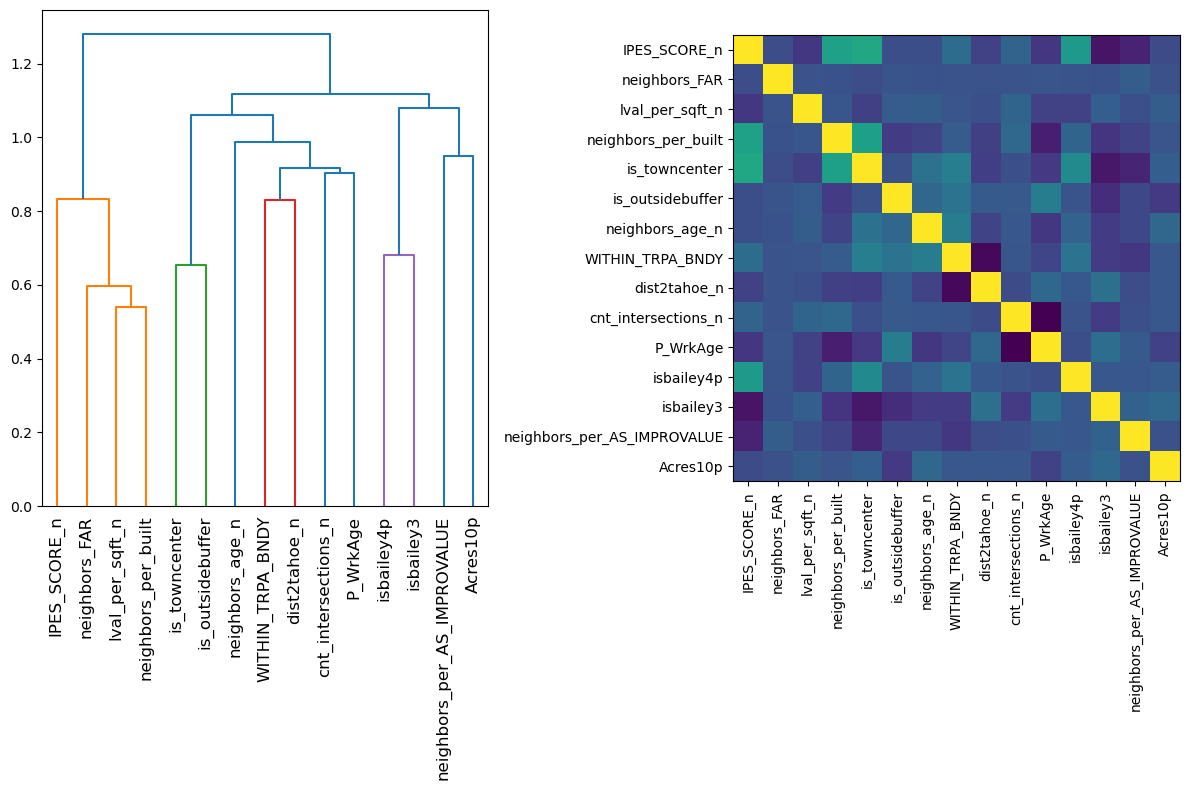

In [ ]:
#Remove highly correlated features
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

corr=Parcels[X_cols_n].corr()

corr_triu=corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
to_drop = [col for col in corr_triu.columns if any(corr_triu[col].abs() > 0.5)]
sel_variables=[c for c in X_cols_n if c not in to_drop]

# feature selection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8)) 

#create corr matrix between all possible columns
# Ensure the correlation matrix is symmetric
corr=Parcels[sel_variables].corr()
corr=np.asmatrix(corr.to_numpy())
corr = (corr + corr.T) / 2
#np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)


dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(
    dist_linkage, labels=sel_variables, ax=ax1, leaf_rotation=90
)
dendro_idx = np.arange(0, len(dendro["ivl"]))

try:
  ax2.imshow(corr[dendro_idx, :][:, dendro_idx])
  ax2.set_xticks(dendro_idx)
  ax2.set_yticks(dendro_idx)
except Exception:
  # Handle potential MultiIndex indexing error here
  pass  # Replace with appropriate error handling
ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
ax2.set_yticklabels(dendro["ivl"])
fig.tight_layout()
plt.show()

In [ ]:
Parcels.loc[Parcels.BUILDING_SQFT.isnull(), ['APN','BUILDING_SQFT','EXISTING_LANDUSE']]

,APN,BUILDING_SQFT,EXISTING_LANDUSE
1886,1419-00-001-002,NaN,Open Space
61052,090-282-018,NaN,Commercial
61053,097-140-043,NaN,Single Family Residential
61054,116-080-003,NaN,Single Family Residential
61055,097-130-030,NaN,Multi-Family Residential
...,...,...,...
61226,1318-10-310-096,NaN,Single Family Residential
61227,1318-10-310-097,NaN,Condominium Common Area
61228,1318-10-417-055,NaN,Single Family Residential
61229,1318-10-310-094,NaN,Single Family Residential


In [ ]:
Parcels['BUILDING_SQFT']=Parcels['BUILDING_SQFT'].fillna(0)

In [ ]:
Parcels.loc[Parcels.DUA.isnull(), ['APN','BUILDING_SQFT','EXISTING_LANDUSE','DUA','DENSITY']]

,APN,BUILDING_SQFT,EXISTING_LANDUSE,DUA,DENSITY
1483,097-050-097,0.0,Public Service,NaN,NaN
1484,097-020-012,0.0,Open Space,NaN,NaN
1485,097-060-027,0.0,Open Space,NaN,NaN
1486,085-010-011,0.0,Open Space,NaN,NaN
1487,097-020-014,0.0,Open Space,NaN,NaN
...,...,...,...,...,...
61226,1318-10-310-096,0.0,Single Family Residential,NaN,NaN
61227,1318-10-310-097,0.0,Condominium Common Area,NaN,NaN
61228,1318-10-417-055,0.0,Single Family Residential,NaN,NaN
61229,1318-10-310-094,0.0,Single Family Residential,NaN,NaN


In [ ]:
unbuildable_cats=['Vacant, other or unknown',
       'Other, unbuildable: roads, restrictions, terrain',
       'Splinter, unbuildable: small size or shape',
       'Vacant - Public Use Lands',
       'Vacant - Splinter and Other Unbuildable', 'Parks for Public Use',
       'Communication, Transportation, and Utility Property of a Local Nature Under Construction',
       'AGP MSC RURAL RESTRICTIVE ZONING - CLCA (ACTIVE)',
       'RLU MSC ENV. SENSITIVE LAND - RESTRICTED USE',
 'SKI FACILITY',
     'UTILITIES, PUBLIC & PRIVATE',
       'RIVERS, LAKES, RESERVOIR, CANAL', 'HIGHWAYS, ROADS, STREETS',
 'TIMBERLAND, ZONED TPZ',
       'Communication, Transportation, and Utility Property of a Local Nature',
       'TPZ MSC TIMBER PRESERVE ZONING - ACTIVE',
       'AGP MSC RURAL RESTRICTIVE ZONING - NON-RENEWAL',
       'CONSERVATION EASEMENT RESTRICTIONS', 
       'COMMON AREA','NON-PROFIT CAMPS/PARKS', 'GOLF COURSE', 'GREENBELT', 'TIMBERLAND, UNRESTRICTED']

In [ ]:
Parcels.loc[:, 'is_towncenter']=0
Parcels.loc[:, 'is_outsidebuffer']=0
Parcels.loc[Parcels.LOCATION_TO_TOWNCENTER.isin(['Town Center','Within Town Center']), 'is_towncenter']=1
Parcels.loc[Parcels.LOCATION_TO_TOWNCENTER.isin(['Outside Buffer']), 'is_outsidebuffer']=1

In [ ]:
developed_parcels=Parcels.loc[(Parcels.YEAR_BUILT>=2010) &(Parcels.BUILDING_SQFT>0) & ~(Parcels.EXISTING_LANDUSE.isin(['Open Space', 'Vacant']))].copy()
developed_parcels.EXISTING_LANDUSE.unique()

array(['Single Family Residential', 'Condominium',
       'Condominium Common Area', 'Commercial',
       'Multi-Family Residential', 'Tourist Accommodation',
       'Public Service'], dtype=object)

In [ ]:
developed_parcels

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,STGEOMETRY.LEN,GEOID10,GEOID20,jph_balance_n,network_densityaao_n,Per_AO0,d5dei_1,P_WrkAge,is_towncenter,is_outsidebuffer
2029,122-100-26,12210026.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,2919359.0,8904359,...,13948.768472,320310033081,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1
2030,122-100-27,12210027.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,8124165.0,14109165,...,13948.768472,320310033081,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1
2031,122-100-28,12210028.0,200,Single Family Residence,Single Family Residential,Residential,NaN,4882500,989471.0,5871971,...,13948.768472,320310033081,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1
2033,122-111-02,12211102.0,200,Single Family Residence,Single Family Residential,Residential,NaN,165375,530472.0,695847,...,13948.768472,320310033081,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1
2187,122-126-16,12212616.0,200,Single Family Residence,Single Family Residential,Residential,NaN,183750,670330.0,854080,...,13948.768472,320310033081,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60840,090-113-020,90113020.0,01,"SINGLE FAM RES, HALF PLEX",Single Family Residential,Residential,NaN,198147,409616.0,607763,...,4246.546264,060610201072,60610201072,0.000303,0.000000,1.173333e-01,0,0.762,0,0
60867,117-150-044,117150044.0,04,"SINGLE FAM RES, CONDO",Condominium,Mixed-Use,NaN,358938,836481.0,1195419,...,33608.347692,060610201062,60610201062,0.000329,0.005856,4.081633e-02,0,0.629,1,0
60897,111-270-061,111270061.0,01,"SINGLE FAM RES, HALF PLEX",Single Family Residential,Residential,792.0,195213,833290.0,1028503,...,33608.347692,060610201062,60610201062,0.000329,0.005856,4.081633e-02,0,0.629,0,1
60901,112-280-040,112280040.0,01,"SINGLE FAM RES, HALF PLEX",Single Family Residential,Residential,872.0,255000,1479000.0,1734000,...,15238.270648,060610201061,60610201061,0.000541,0.002897,5.551115e-17,0,0.694,0,1


In [ ]:
def get_alternative_parcels(df, developed_parcel, num_samples):
    alternatives = df[(df.APN != developed_parcel) &  ((df.BUILDING_SQFT==0)| (df.BUILDING_SQFT.isnull()) ) & ((df.YEAR_BUILT<2010) | (df.YEAR_BUILT.isnull())) & ~(df.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats))]
    return alternatives.sample(num_samples, replace=True)

# Function to create dataframe with developed and alternative parcels
def create_choice_data(df, num_samples):
    choice_data = []
    for index, row in df.loc[df.APN.isin(developed_parcels.APN.unique())].iterrows():
        #print(index)
        developed_parcel = row["APN"]
        alternative_parcels = get_alternative_parcels(df.copy(), developed_parcel, num_samples)
        #print(alternative_parcels.shape)
        #alternative_parcels = get_undeveloped_parcels(df.copy(), num_samples)
        alternative_data = alternative_parcels.to_dict(orient="records")
        for alt_parcel in alternative_data:
            alt_parcel["choice"] = developed_parcel  # Developed parcel is the choice for alternatives
            choice_data.append(alt_parcel)
    return pd.DataFrame(choice_data)

# Get choice data with developed and 29 alternative parcels for each
df_choice = create_choice_data(Parcels, num_samples=29)
df_choice  


,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,GEOID10,GEOID20,jph_balance_n,network_densityaao_n,Per_AO0,d5dei_1,P_WrkAge,is_towncenter,is_outsidebuffer,choice
0,090-135-031,90135031.0,68,"CAMPS & PARKS, GENERAL",Recreation,Mixed-Use,NaN,0,0.0,0,...,060610201073,60610201073,0.000859,0.000000,5.551115e-17,0,0.635,1,0,122-100-26
1,097-243-012,97243012.0,37,"MINI-STORAGE, COVERED STORAGE",Commercial,Tourist,NaN,0,0.0,0,...,060610223002,60610223002,0.001366,0.000000,7.142857e-02,0,0.552,0,1,122-100-26
2,090-046-030,90046030.0,20,"VACANT, COMMERCIAL",Vacant,Mixed-Use,NaN,120573,0.0,120573,...,060610201072,60610201072,0.000303,0.000000,1.173333e-01,0,0.762,0,1,122-100-26
3,123-032-22,12303222.0,120,"Vacant, single family",Vacant,,838.0,560000,0.0,560000,...,320310033083,320310033083,0.001155,0.000000,0.000000e+00,0,0.186,0,0,122-100-26
4,032-211-018,32211018.0,30,VAC COM VACANT COMMERCIAL LAND,Vacant,Mixed-Use,NaN,0,0.0,0,...,060170304022,60170304022,0.001482,0.000773,1.942149e-01,0,0.625,0,1,122-100-26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,033-422-019,33422019.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,060170305022,60170305022,0.000103,0.007859,4.000481e-13,0,0.600,0,1,112-250-034
48194,025-580-014,25580014.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,752.0,260100,0.0,260100,...,060170302002,60170302002,0.001620,0.001351,9.375000e-02,0,0.740,0,0,112-250-034
48195,125-352-02,12535202.0,120,"Vacant, single family",Open Space,Residential,NaN,96250,0.0,96250,...,320310033082,320310033082,0.000149,0.000000,0.000000e+00,0,0.576,0,1,112-250-034
48196,033-363-013,33363013.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,0.0,4921,0.0,4921,...,060170305021,60170305021,0.000051,0.009810,-2.775558e-17,0,0.711,0,1,112-250-034


In [ ]:
developed_parcels['choice']=developed_parcels['APN']
developed_parcels['chosen']=1
df_choice['chosen']=0
all_alternatives=pd.concat([developed_parcels,df_choice])
all_alternatives

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,GEOID20,jph_balance_n,network_densityaao_n,Per_AO0,d5dei_1,P_WrkAge,is_towncenter,is_outsidebuffer,choice,chosen
2029,122-100-26,12210026.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,2919359.0,8904359,...,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1,122-100-26,1
2030,122-100-27,12210027.0,200,Single Family Residence,Single Family Residential,Residential,NaN,5985000,8124165.0,14109165,...,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1,122-100-27,1
2031,122-100-28,12210028.0,200,Single Family Residence,Single Family Residential,Residential,NaN,4882500,989471.0,5871971,...,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1,122-100-28,1
2033,122-111-02,12211102.0,200,Single Family Residence,Single Family Residential,Residential,NaN,165375,530472.0,695847,...,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1,122-111-02,1
2187,122-126-16,12212616.0,200,Single Family Residence,Single Family Residential,Residential,NaN,183750,670330.0,854080,...,320310033081,0.000263,0.000000,6.413994e-02,0,0.460,0,1,122-126-16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48193,033-422-019,33422019.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,60170305022,0.000103,0.007859,4.000481e-13,0,0.600,0,1,112-250-034,0
48194,025-580-014,25580014.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,752.0,260100,0.0,260100,...,60170302002,0.001620,0.001351,9.375000e-02,0,0.740,0,0,112-250-034,0
48195,125-352-02,12535202.0,120,"Vacant, single family",Open Space,Residential,NaN,96250,0.0,96250,...,320310033082,0.000149,0.000000,0.000000e+00,0,0.576,0,1,112-250-034,0
48196,033-363-013,33363013.0,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,0.0,4921,0.0,4921,...,60170305021,0.000051,0.009810,-2.775558e-17,0,0.711,0,1,112-250-034,0


In [ ]:
all_alternatives.select_dtypes(include=np.number).corr()['chosen'].sort_values(key=abs)

Acreslt4000sqft     -0.000280
TAZ                 -0.001727
OBJECTID            -0.001962
Acreshalfto1acres   -0.001968
per_AS_IMPROVALUE   -0.003138
                       ...   
sqft_per_unit        0.706738
BEDROOMS             0.805591
YEAR_BUILT           0.819539
chosen               1.000000
bldage                    NaN
Name: chosen, Length: 81, dtype: float64

<Axes: >

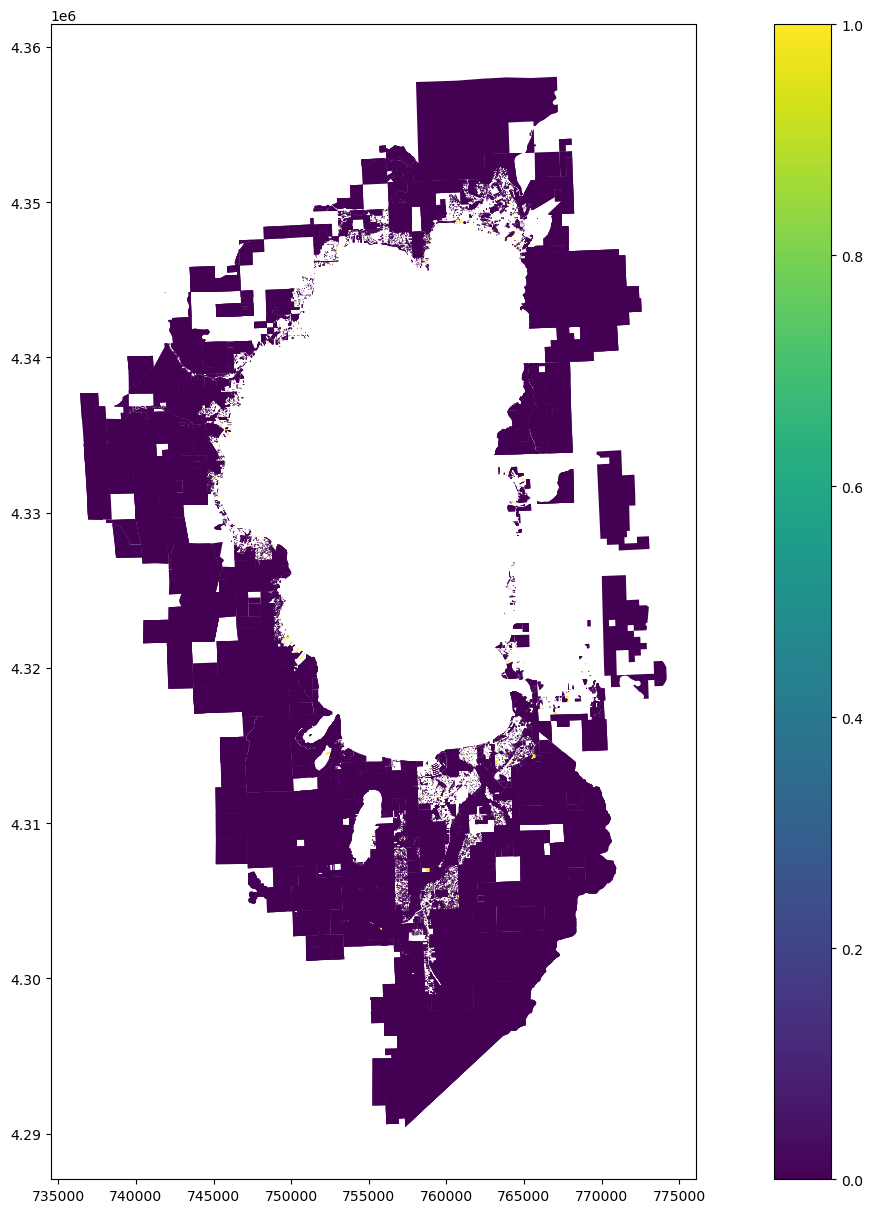

In [ ]:
all_alternatives.set_geometry('polygeom').plot('chosen', legend=True, figsize=(20,15))

chosen
0    Axes(0.125,0.11;0.775x0.77)
1    Axes(0.125,0.11;0.775x0.77)
Name: neighbors_per_built, dtype: object

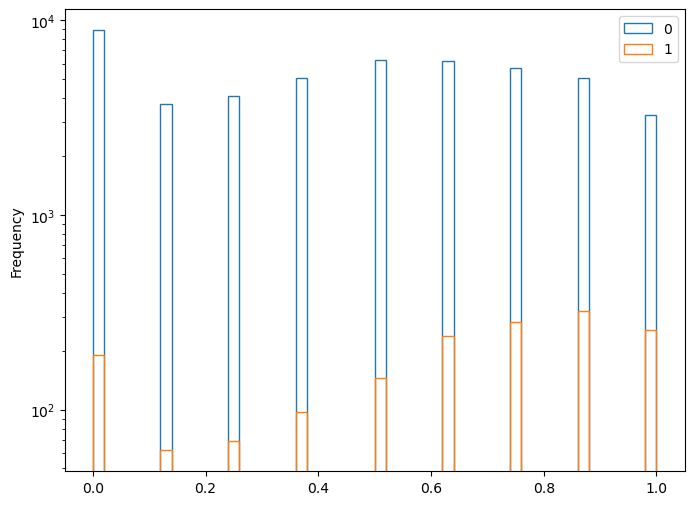

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
hist, bins = np.histogram(all_alternatives['neighbors_per_built'], bins=50)
all_alternatives.groupby('chosen')['neighbors_per_built'].plot(kind='hist', ax=ax, bins=bins, log=True, 
                                                         histtype='step', legend=True)

In [ ]:
all_alternatives['ID']=pd.factorize(all_alternatives['choice'])[0]+1
all_alternatives['Alt_ID'] = all_alternatives.groupby('choice')['APN'].rank(ascending=False, method='first').astype(int)
all_alternatives['Alt_Name']=all_alternatives['Alt_ID'].map(lambda x: str(x)+'ALt')
all_alternatives.sort_values(by=['ID','Alt_ID']) 

,APN,PPNO,COUNTY_LANDUSE_CODE,COUNTY_LANDUSE_DESCRIPTION,EXISTING_LANDUSE,REGIONAL_LANDUSE,IPES_SCORE,AS_LANDVALUE,AS_IMPROVALUE,AS_SUM,...,Per_AO0,d5dei_1,P_WrkAge,is_towncenter,is_outsidebuffer,choice,chosen,ID,Alt_ID,Alt_Name
9,1418-10-710-062,1.418107e+11,270,Single Family Residential Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,3.544304e-02,0,0.528,0,1,122-100-26,0,1,1,1ALt
23,1318-22-314-006,1.318223e+11,240,None,Single Family Residential,Residential,NaN,0,74870.0,74870,...,1.111111e-01,0,0.778,0,0,122-100-26,0,1,2,2ALt
13,129-350-00,1.293500e+07,240,Common Area,Condominium Common Area,Residential,NaN,0,0.0,0,...,0.000000e+00,0,0.531,0,1,122-100-26,0,1,3,3ALt
19,125-564-02,1.255640e+07,120,"Vacant, single family",Open Space,Residential,781.0,96250,0.0,96250,...,6.413994e-02,0,0.460,0,1,122-100-26,0,1,4,4ALt
27,125-441-14,1.254411e+07,120,"Vacant, single family",Open Space,Residential,NaN,96250,0.0,96250,...,0.000000e+00,0,0.576,0,1,122-100-26,0,1,5,5ALt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48191,025-920-033,2.592003e+07,,,,Residential,NaN,0,0.0,0,...,1.347150e-01,0,0.656,0,0,112-250-034,0,1662,26,26ALt
48194,025-580-014,2.558001e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,752.0,260100,0.0,260100,...,9.375000e-02,0,0.740,0,0,112-250-034,0,1662,27,27ALt
48185,025-461-009,2.546101e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Open Space,Residential,NaN,0,0.0,0,...,7.342657e-02,0,0.631,0,1,112-250-034,0,1662,28,28ALt
48177,023-694-013,2.369401e+07,00,VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS,Vacant,Residential,403.0,3390,0.0,3390,...,5.806452e-02,0,0.517,0,1,112-250-034,0,1662,29,29ALt


In [ ]:
df_w=all_alternatives.pivot(index='ID', columns='Alt_ID', values=sel_variables+['choice','chosen'])
df_w.columns=[f'{col[0]}_{col[1]}' for col in df_w.columns]
df_w.reset_index(inplace=True)
df_w['choice']=df_w[[f'chosen_{c}' for c in range(1,31)]].idxmax(axis=1).map(lambda x: int(x.split('_')[1]))
df_w['APN']=df_w['choice_1']
df_w.drop(columns=['choice_'+str(i) for i in range(1,31)], inplace=True)
df_w.drop(columns=[f'chosen_{c}' for c in range(1,31)], inplace=True)
#df_w[df_w.columns[df_w.dtypes=='object'][30:-1]]=df_w[df_w.columns[df_w.dtypes=='object'][30:-1]].apply(pd.to_numeric, errors='coerce')
df_w.set_index('APN')

,ID,lval_per_sqft_n_1,lval_per_sqft_n_2,lval_per_sqft_n_3,lval_per_sqft_n_4,lval_per_sqft_n_5,lval_per_sqft_n_6,lval_per_sqft_n_7,lval_per_sqft_n_8,lval_per_sqft_n_9,...,P_WrkAge_22,P_WrkAge_23,P_WrkAge_24,P_WrkAge_25,P_WrkAge_26,P_WrkAge_27,P_WrkAge_28,P_WrkAge_29,P_WrkAge_30,choice
APN,,,,,,,,,,,,,,,,,,,,,
122-100-26,1,0.0,0.0,0.0,0.271129,0.305016,0.133736,0.359778,0.448329,0.149923,...,0.528,0.564,0.721,0.744,0.399,0.597,0.597,0.597,0.597,8
122-100-27,2,0.0,0.0,0.242671,0.40826,0.250943,0.397884,0.0,0.0,0.0,...,0.6,0.6,0.528,0.679,0.671,0.885,0.839,0.721,0.597,6
122-100-28,3,0.0,0.257616,0.300241,0.52567,0.0,0.0,0.170405,0.0,0.0,...,0.558,0.679,0.696,0.625,0.593,0.591,0.597,0.597,0.597,4
122-111-02,4,0.0,0.0,0.10871,0.0,0.249072,0.259242,0.0,0.150879,0.264197,...,0.6,0.633,0.631,0.693,0.564,0.744,0.597,0.597,0.597,5
122-126-16,5,-0.072003,0.590709,0.20845,0.136112,-0.329598,0.312237,0.353977,0.395749,0.405332,...,0.721,0.721,0.744,0.696,0.591,0.597,0.597,0.658,0.658,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
090-113-020,1658,0.0,0.266242,0.34373,0.294752,0.0,0.440785,0.058602,0.585931,0.0,...,0.6,0.595,0.513,0.671,0.593,0.593,0.597,0.658,0.597,16
117-150-044,1659,0.118538,0.0,0.431281,0.261211,0.229114,0.205082,0.284336,0.259316,0.765652,...,0.564,0.696,0.591,0.591,0.597,0.597,0.597,0.658,0.591,9
111-270-061,1660,0.0,0.0,0.188105,0.239066,0.0,0.0,0.0,0.388652,0.0,...,0.558,0.839,0.721,0.696,0.729,0.597,0.597,0.597,0.597,8


In [ ]:
#Create 3 different market segmentations  
devtypes={'Single Family Residential':0,'Condominium':0,'Condominium Common Area':0, 'Multi-Family Residential':0, 'Commercial':1, 'Public Service':1, 'Tourist Accommodation' :1 }
developed_parcels['DEV2TYPE']=developed_parcels['EXISTING_LANDUSE'].map(lambda x: devtypes[x]) 

devtypes={'Single Family Residential':0,'Condominium':1,'Condominium Common Area':1, 'Multi-Family Residential':1, 'Commercial':2, 'Public Service':2, 'Tourist Accommodation' :2 }
developed_parcels['DEV3TYPE']=developed_parcels['EXISTING_LANDUSE'].map(lambda x: devtypes[x])    

devtypes={'Single Family Residential':0,'Condominium':1,'Condominium Common Area':1, 'Multi-Family Residential':2, 'Commercial':3, 'Public Service':4, 'Tourist Accommodation' :5 }
developed_parcels['DEV5TYPE']=developed_parcels['EXISTING_LANDUSE'].map(lambda x: devtypes[x]) 

df_w=df_w.merge(developed_parcels[['APN','DEV2TYPE','DEV3TYPE','DEV5TYPE']], on='APN', how='inner')
df_w

,ID,lval_per_sqft_n_1,lval_per_sqft_n_2,lval_per_sqft_n_3,lval_per_sqft_n_4,lval_per_sqft_n_5,lval_per_sqft_n_6,lval_per_sqft_n_7,lval_per_sqft_n_8,lval_per_sqft_n_9,...,P_WrkAge_26,P_WrkAge_27,P_WrkAge_28,P_WrkAge_29,P_WrkAge_30,choice,APN,DEV2TYPE,DEV3TYPE,DEV5TYPE
0,1,0.0,0.0,0.0,0.271129,0.305016,0.133736,0.359778,0.448329,0.149923,...,0.399,0.597,0.597,0.597,0.597,8,122-100-26,0,0,0
1,2,0.0,0.0,0.242671,0.40826,0.250943,0.397884,0.0,0.0,0.0,...,0.671,0.885,0.839,0.721,0.597,6,122-100-27,0,0,0
2,3,0.0,0.257616,0.300241,0.52567,0.0,0.0,0.170405,0.0,0.0,...,0.593,0.591,0.597,0.597,0.597,4,122-100-28,0,0,0
3,4,0.0,0.0,0.10871,0.0,0.249072,0.259242,0.0,0.150879,0.264197,...,0.564,0.744,0.597,0.597,0.597,5,122-111-02,0,0,0
4,5,-0.072003,0.590709,0.20845,0.136112,-0.329598,0.312237,0.353977,0.395749,0.405332,...,0.591,0.597,0.597,0.658,0.658,6,122-126-16,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,1658,0.0,0.266242,0.34373,0.294752,0.0,0.440785,0.058602,0.585931,0.0,...,0.593,0.593,0.597,0.658,0.597,16,090-113-020,0,0,0
1658,1659,0.118538,0.0,0.431281,0.261211,0.229114,0.205082,0.284336,0.259316,0.765652,...,0.597,0.597,0.597,0.658,0.591,9,117-150-044,0,1,1
1659,1660,0.0,0.0,0.188105,0.239066,0.0,0.0,0.0,0.388652,0.0,...,0.729,0.597,0.597,0.597,0.597,8,111-270-061,0,0,0
1660,1661,-0.65552,0.0,0.0,0.0,0.421019,0.0,0.0,0.0,-0.382164,...,0.656,0.696,0.591,0.597,0.597,5,112-280-040,0,0,0


In [ ]:
#IDentify characteristic varables
char_columns = df_w.select_dtypes(['object']).columns
char_columns.to_list()

['lval_per_sqft_n_1',
 'lval_per_sqft_n_2',
 'lval_per_sqft_n_3',
 'lval_per_sqft_n_4',
 'lval_per_sqft_n_5',
 'lval_per_sqft_n_6',
 'lval_per_sqft_n_7',
 'lval_per_sqft_n_8',
 'lval_per_sqft_n_9',
 'lval_per_sqft_n_10',
 'lval_per_sqft_n_11',
 'lval_per_sqft_n_12',
 'lval_per_sqft_n_13',
 'lval_per_sqft_n_14',
 'lval_per_sqft_n_15',
 'lval_per_sqft_n_16',
 'lval_per_sqft_n_17',
 'lval_per_sqft_n_18',
 'lval_per_sqft_n_19',
 'lval_per_sqft_n_20',
 'lval_per_sqft_n_21',
 'lval_per_sqft_n_22',
 'lval_per_sqft_n_23',
 'lval_per_sqft_n_24',
 'lval_per_sqft_n_25',
 'lval_per_sqft_n_26',
 'lval_per_sqft_n_27',
 'lval_per_sqft_n_28',
 'lval_per_sqft_n_29',
 'lval_per_sqft_n_30',
 'neighbors_per_AS_IMPROVALUE_1',
 'neighbors_per_AS_IMPROVALUE_2',
 'neighbors_per_AS_IMPROVALUE_3',
 'neighbors_per_AS_IMPROVALUE_4',
 'neighbors_per_AS_IMPROVALUE_5',
 'neighbors_per_AS_IMPROVALUE_6',
 'neighbors_per_AS_IMPROVALUE_7',
 'neighbors_per_AS_IMPROVALUE_8',
 'neighbors_per_AS_IMPROVALUE_9',
 'neighbors_p

In [ ]:
#Coerce numeric variables to numeric
df_w[char_columns[:-1]]=df_w[char_columns[:-1]].apply(pd.to_numeric, errors='coerce')

In [ ]:
#Doulbe check remaining character columns
char_columns = df_w.select_dtypes(['object']).columns
char_columns

Index(['APN'], dtype='object')

In [ ]:
#Remove characteristic columns
df_w.drop(columns=char_columns, inplace=True)
df_w.fillna(0, inplace=True)

In [ ]:
#Create av columns required by BIOGEME to indicate whether the parcel alternative is available for development choice
ncols_df = pd.DataFrame(index=df_w.index)

ncols=['av_'+str(i) for i in range(1,31)]
for c in ncols:
    ncols_df[c]=1

df_w = pd.concat([df_w, ncols_df], axis=1).copy()

for i in range(1,31):
    df_w.loc[:,'av_'+str(i)]=1


In [ ]:
#import biogeme libraries
import biogeme.biogeme as bio
from biogeme import models
from biogeme.expressions import Beta
from biogeme import database as db
from biogeme.catalog import segmentation_catalogs
from biogeme.results import compile_estimation_results, pareto_optimal

# Define choice variabl
choice_var = "choice"
database=db.Database("resdev_db",df_w)
globals().update(database.variables)
database.variables

{'ID': ID,
 'lval_per_sqft_n_1': lval_per_sqft_n_1,
 'lval_per_sqft_n_2': lval_per_sqft_n_2,
 'lval_per_sqft_n_3': lval_per_sqft_n_3,
 'lval_per_sqft_n_4': lval_per_sqft_n_4,
 'lval_per_sqft_n_5': lval_per_sqft_n_5,
 'lval_per_sqft_n_6': lval_per_sqft_n_6,
 'lval_per_sqft_n_7': lval_per_sqft_n_7,
 'lval_per_sqft_n_8': lval_per_sqft_n_8,
 'lval_per_sqft_n_9': lval_per_sqft_n_9,
 'lval_per_sqft_n_10': lval_per_sqft_n_10,
 'lval_per_sqft_n_11': lval_per_sqft_n_11,
 'lval_per_sqft_n_12': lval_per_sqft_n_12,
 'lval_per_sqft_n_13': lval_per_sqft_n_13,
 'lval_per_sqft_n_14': lval_per_sqft_n_14,
 'lval_per_sqft_n_15': lval_per_sqft_n_15,
 'lval_per_sqft_n_16': lval_per_sqft_n_16,
 'lval_per_sqft_n_17': lval_per_sqft_n_17,
 'lval_per_sqft_n_18': lval_per_sqft_n_18,
 'lval_per_sqft_n_19': lval_per_sqft_n_19,
 'lval_per_sqft_n_20': lval_per_sqft_n_20,
 'lval_per_sqft_n_21': lval_per_sqft_n_21,
 'lval_per_sqft_n_22': lval_per_sqft_n_22,
 'lval_per_sqft_n_23': lval_per_sqft_n_23,
 'lval_per_sqft_n_

In [ ]:
     

#define beta to be estimated for utility funciton
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)
    #expr="(B_"+c+"_catalog,)=  segmentation_catalogs(generic_name='B_"+c+"', beta_parameters=[B_"+c+"], potential_segmentations=(segmentation_devtype, ),  maximum_number=1,)"
    #print(expr)
    #exec(expr)

for i in range(1,31):
    #betasMultiVar=["B_"+c+"_catalog*"+c+"_"+str(i) for c in sel_variables]
    betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables]
    expr="V"+str(i)+"="+"+".join(betasMultiVar)
    #print(expr)
    exec(expr)

V={}
for i in range(1,31):
    expr="V["+str(i)+"]=V"+str(i)
    exec(expr)
    
av={i:eval('av_'+str(i)) for i in range(1,31)}
logprob=models.loglogit(V,av,choice)
mybiogeme=bio.BIOGEME(database, logprob)
mybiogeme.modelName='trpadev_logit'

results=mybiogeme.estimate()
#results=mybiogeme.estimate_catalog()
print(results.shortSummary())

# Get the results in a pandas table
pandas_results = results.getEstimatedParameters()
print(pandas_results)

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model trpadev_logit
Nbr of parameters:		15
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2793.543
Akaike Information Criterion:	5617.087
Bayesian Information Criterion:	5698.323

                                   Value  Rob. Std err  Rob. t-test  \
B_Acres10p                     -2.044855  1.008718e+00    -2.027181   
B_IPES_SCORE_n                  0.184043  1.007659e-01     1.826439   
B_P_WrkAge                      0.057526  2.691919e-01     0.213698   
B_WITHIN_TRPA_BNDY              0.607906  4.127503e-01     1.472817   
B_cnt_intersections_n           0.766132  1.842590e-01     4.157907   
B_dist2tahoe_n                  3.554140  2.476657e-01    14.350552   
B_is_outsidebuffer              0.004411  8.502440e-02     0.051877   
B_is_towncenter                -0.226281  1.699443e-01    -1.331502   
B_isbailey3                     0.523112  1.285494e-01     4.069345   
B_isbailey4p                    0.427888  8.021877e-02     5.334016   
B_lval_per_

In [ ]:
best_acc=0
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
#define beta to be estimated for utility funciton

    
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)
    
while len(sel_variables)>0:
    for i in range(1,31):
        betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables]
        expr="V"+str(i)+"="+"+".join(betasMultiVar)
        #print(expr)
        exec(expr)

    V={}
    for i in range(1,31):
        expr="V["+str(i)+"]=V"+str(i)
        exec(expr)
    
    av={i:eval('av_'+str(i)) for i in range(1,31)}
    logprob=models.loglogit(V,av,choice)
    mybiogeme=bio.BIOGEME(database, logprob)
    mybiogeme.modelName='resdev_logit'

    results=mybiogeme.estimate()
    print(results.shortSummary())

    # Get the results in a pandas table
    pandas_results = results.getEstimatedParameters()
    print(pandas_results)
    
    stats = results.getGeneralStatistics()
    cur_acc=1-(stats['Final log likelihood'].value-len(sel_variables))/nulllog
    print(cur_acc)
    if cur_acc<best_acc:
        break
    else:
        best_acc=cur_acc
    worst_p=pandas_results['Rob. p-value'].idxmax()
    sel_variables.remove(worst_p[2:])
    print(sel_variables)

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		15
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2881.006
Akaike Information Criterion:	5792.012
Bayesian Information Criterion:	5873.248

                                  Value  Rob. Std err  Rob. t-test  \
B_Acres10p                    -2.337103  1.121774e+00    -2.083399   
B_IPES_SCORE_n                 0.109367  9.789234e-02     1.117221   
B_P_WrkAge                     0.827230  2.682539e-01     3.083759   
B_WITHIN_TRPA_BNDY             0.605755  3.277467e-01     1.848242   
B_cnt_intersections_n          0.294993  1.775606e-01     1.661365   
B_dist2tahoe_n                 1.795803  2.647260e-01     6.783630   
B_is_outsidebuffer            -0.046156  8.034095e-02    -0.574507   
B_is_towncenter                0.157532  1.375649e-01     1.145148   
B_isbailey3                    0.555062  1.313587e-01     4.225544   
B_isbailey4p                   0.557197  7.683177e-02     7.252172   
B_lval_per_sqft_n      

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		14
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2793.545
Akaike Information Criterion:	5615.09
Bayesian Information Criterion:	5690.911

                                   Value  Rob. Std err  Rob. t-test  \
B_Acres10p                     -2.044042  1.008167e+00    -2.027484   
B_IPES_SCORE_n                  0.184407  1.004894e-01     1.835087   
B_P_WrkAge                      0.056741  2.687360e-01     0.211139   
B_WITHIN_TRPA_BNDY              0.611397  4.077440e-01     1.499463   
B_cnt_intersections_n           0.764619  1.826213e-01     4.186911   
B_dist2tahoe_n                  3.554675  2.478197e-01    14.343797   
B_is_towncenter                -0.229378  1.578526e-01    -1.453117   
B_isbailey3                     0.523688  1.279630e-01     4.092501   
B_isbailey4p                    0.427909  8.022833e-02     5.333645   
B_lval_per_sqft_n              10.097499  1.966141e-01    51.356950   
B_neighbors_F

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		13
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2793.567
Akaike Information Criterion:	5613.134
Bayesian Information Criterion:	5683.539

                                   Value  Rob. Std err  Rob. t-test  \
B_Acres10p                     -2.043728  1.008807e+00    -2.025886   
B_IPES_SCORE_n                  0.183730  1.001504e-01     1.834540   
B_WITHIN_TRPA_BNDY              0.604292  4.048852e-01     1.492503   
B_cnt_intersections_n           0.766810  1.826755e-01     4.197662   
B_dist2tahoe_n                  3.562256  2.442897e-01    14.582098   
B_is_towncenter                -0.230130  1.577624e-01    -1.458710   
B_isbailey3                     0.525973  1.272037e-01     4.134890   
B_isbailey4p                    0.429678  7.902870e-02     5.436983   
B_lval_per_sqft_n              10.098894  1.970239e-01    51.257198   
B_neighbors_FAR                -3.448605  2.941813e-01   -11.722719   
B_neighbors_

The syntax "shortSummary" is deprecated and is replaced by the syntax "short_summary".


Results for model resdev_logit
Nbr of parameters:		12
Sample size:			1662
Excluded data:			0
Final log likelihood:		-2794.988
Akaike Information Criterion:	5613.975
Bayesian Information Criterion:	5678.965

                                   Value  Rob. Std err  Rob. t-test  \
B_Acres10p                     -2.058611  1.008971e+00    -2.040308   
B_IPES_SCORE_n                  0.208956  9.887500e-02     2.113338   
B_WITHIN_TRPA_BNDY              0.595847  4.058537e-01     1.468133   
B_cnt_intersections_n           0.717514  1.842466e-01     3.894312   
B_dist2tahoe_n                  3.580429  2.437539e-01    14.688708   
B_isbailey3                     0.520697  1.269544e-01     4.101452   
B_isbailey4p                    0.415714  7.877464e-02     5.277254   
B_lval_per_sqft_n              10.045517  2.003982e-01    50.127767   
B_neighbors_FAR                -3.453696  2.941285e-01   -11.742133   
B_neighbors_age_n               1.527304  2.084328e-01     7.327562   
B_neighbors_

In [ ]:
# Get general statistics
print('General statistics')
print('------------------')
stats = results.getGeneralStatistics()
for description, (value, formatting) in stats.items():
    print(f'{description}: {value:{formatting}}')

General statistics
------------------


AttributeError: 'dict' object has no attribute 'getGeneralStatistics'

In [ ]:
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
modified_Rho_Sq=1-(stats['Final log likelihood'].value-len(sel_variables))/nulllog
modified_Rho_Sq

0.5034332217705437

In [ ]:
pandas_results['fields']=pandas_results.index
pandas_results.to_csv(r'.\development_model.csv', index=False)
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value,fields
B_Acres10p,-2.058611,1.008971e+00,-2.040308,4.131970e-02,B_Acres10p
B_IPES_SCORE_n,0.208956,9.887500e-02,2.113338,3.457182e-02,B_IPES_SCORE_n
B_WITHIN_TRPA_BNDY,0.595847,4.058537e-01,1.468133,1.420680e-01,B_WITHIN_TRPA_BNDY
B_cnt_intersections_n,0.717514,1.842466e-01,3.894312,9.847787e-05,B_cnt_intersections_n
B_dist2tahoe_n,3.580429,2.437539e-01,14.688708,0.000000e+00,B_dist2tahoe_n
B_isbailey3,0.520697,1.269544e-01,4.101452,4.105655e-05,B_isbailey3
B_isbailey4p,0.415714,7.877464e-02,5.277254,1.311343e-07,B_isbailey4p
B_lval_per_sqft_n,10.045517,2.003982e-01,50.127767,0.000000e+00,B_lval_per_sqft_n
B_neighbors_FAR,-3.453696,2.941285e-01,-11.742133,0.000000e+00,B_neighbors_FAR
B_neighbors_age_n,1.527304,2.084328e-01,7.327562,2.344791e-13,B_neighbors_age_n


In [ ]:
sel_variables=[c[2:] for c in pandas_results.loc[pandas_results.Value!=0].index]

sel_variables_1=['isbailey3','isbailey4p','IPES_SCORE_n' ]
sel_variables_2=[c for c in sel_variables if c not in sel_variables_1]

segmentation_dev2types = database.generate_segmentation(
    variable='DEV2TYPE', mapping={0: 'RES', 1: 'NR'}
)

segmentation_dev3types = database.generate_segmentation(
    variable='DEV3TYPE', mapping={0: 'SF', 1: 'MF', 2: 'NR'}
)

segmentation_dev5types = database.generate_segmentation(
    variable='DEV5TYPE', mapping={0: 'SF', 1: 'Con', 2: 'MF', 3: 'COM', 4: 'PUB', 5: 'Tour'}
)


#define beta to be estimated for utility funciton
#restrict minimum of parameters to zero
for c in sel_variables:
    expr="B_"+c+"= Beta('B_"+c+"',0,None,None,0)"
    #print(expr)
    exec(expr)


#define catalog for market segmentations to be analyzed
expr="("+",".join(["B_"+c+"_catalog" for c in sel_variables_2])+")=segmentation_catalogs(generic_name='B_catalog', beta_parameters=["+",".join(["B_"+c for c in sel_variables_2])+"], potential_segmentations=(segmentation_dev2types,segmentation_dev3types,segmentation_dev5types, ),  maximum_number=1)"
print(expr)
exec(expr)

for i in range(1,31):
    #betasMultiVar=["B_"+c+"_catalog*"+c+"_"+str(i) for c in sel_variables]
    betasMultiVar=["B_"+c+"*"+c+"_"+str(i) for c in sel_variables_1]
    betasMultiVar_catalog=["B_"+c+"_catalog*"+c+"_"+str(i) for c in sel_variables_2]
    expr="V"+str(i)+"="+"+".join(betasMultiVar)+"+"+"+".join(betasMultiVar_catalog)
    #print(expr)
    exec(expr)

V={}
for i in range(1,31):
    expr="V["+str(i)+"]=V"+str(i)
    exec(expr)
    
av={i:eval('av_'+str(i)) for i in range(1,31)}
logprob=models.loglogit(V,av,choice)
mybiogeme=bio.BIOGEME(database, logprob)
mybiogeme.modelName='trpadev_logit'

#results=mybiogeme.estimate()
results=mybiogeme.estimate_catalog()
print(results)
compiled_results, specs = compile_estimation_results(
    results, use_short_names=True
)


for short_name, spec in specs.items():
    print(f'{short_name}\t{spec}')

pareto_results = pareto_optimal(results)
compiled_pareto_results, pareto_specs = compile_estimation_results(
    pareto_results, use_short_names=True
)



(B_Acres10p_catalog,B_WITHIN_TRPA_BNDY_catalog,B_cnt_intersections_n_catalog,B_dist2tahoe_n_catalog,B_lval_per_sqft_n_catalog,B_neighbors_FAR_catalog,B_neighbors_age_n_catalog,B_neighbors_per_AS_IMPROVALUE_catalog,B_neighbors_per_built_catalog)=segmentation_catalogs(generic_name='B_catalog', beta_parameters=[B_Acres10p,B_WITHIN_TRPA_BNDY,B_cnt_intersections_n,B_dist2tahoe_n,B_lval_per_sqft_n,B_neighbors_FAR,B_neighbors_age_n,B_neighbors_per_AS_IMPROVALUE,B_neighbors_per_built], potential_segmentations=(segmentation_dev2types,segmentation_dev3types,segmentation_dev5types, ),  maximum_number=1)


No Pareto file has been provided


{'B_catalog:no_seg': <biogeme.results.bioResults object at 0x000002EC6CD32960>, 'B_catalog:DEV3TYPE': <biogeme.results.bioResults object at 0x000002E6FB5C0B90>, 'B_catalog:DEV5TYPE': <biogeme.results.bioResults object at 0x000002E6C7F995B0>, 'B_catalog:DEV2TYPE': <biogeme.results.bioResults object at 0x000002E716B10560>}
Model_000000	B_catalog:no_seg
Model_000001	B_catalog:DEV3TYPE
Model_000002	B_catalog:DEV5TYPE
Model_000003	B_catalog:DEV2TYPE


In [ ]:
compiled_pareto_results

,Model_000000,Model_000001
Number of estimated parameters,12,21
Sample size,1662,1662
Final log likelihood,-2794.987756,-2778.51541
Akaike Information Criterion,5613.975511,5599.030821
Bayesian Information Criterion,5678.964835,5712.762137
B_Acres10p (t-test),-2.06 (-2.04),-2.2 (-1.81)
B_IPES_SCORE_n (t-test),0.209 (2.11),0.21 (2.12)
B_WITHIN_TRPA_BNDY (t-test),0.594 (1.47),0.523 (1.35)
B_cnt_intersections_n (t-test),0.718 (3.89),0.681 (3.67)
B_dist2tahoe_n (t-test),3.58 (14.7),3.61 (14.6)


In [ ]:
compiled_pareto_results.to_csv('.\devmodel\compiled_pareto_results.csv', index=True)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\adc\AppData\Local\Temp\ipykernel_22140\3578894856.py:1: SyntaxWarning: invalid escape sequence '\d'
  compiled_pareto_results.to_csv('.\devmodel\compiled_pareto_results.csv', index=True)


In [ ]:
nulllog=mybiogeme.calculateNullLoglikelihood ( av )
modified_Rho_Sq=1-(compiled_pareto_results.loc['Final log likelihood']-len(sel_variables))/nulllog
modified_Rho_Sq

Model_000000    0.503433
Model_000001    0.506347
Name: Final log likelihood, dtype: object

In [ ]:
pareto_results

{'B_catalog:no_seg': <biogeme.results.bioResults at 0x2ec6cd32960>,
 'B_catalog:DEV2TYPE': <biogeme.results.bioResults at 0x2e716b10560>}

In [ ]:
pandas_results=pareto_results['B_catalog:DEV2TYPE'].getEstimatedParameters()
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value
B_Acres10p,-2.202632,1.215664e+00,-1.811876,7.000539e-02
B_Acres10p_NR,-6.065211,1.269793e+00,-4.776534,1.783422e-06
B_IPES_SCORE_n,0.209508,9.890663e-02,2.118238,3.415496e-02
B_WITHIN_TRPA_BNDY,0.522585,3.884717e-01,1.345232,1.785502e-01
B_WITHIN_TRPA_BNDY_NR,0.148472,9.101519e-01,0.163129,8.704167e-01
B_cnt_intersections_n,0.680614,1.856748e-01,3.665627,2.467336e-04
B_cnt_intersections_n_NR,0.671175,8.717597e-01,0.769908,4.413545e-01
B_dist2tahoe_n,3.610195,2.474472e-01,14.589761,0.000000e+00
B_dist2tahoe_n_NR,-4.939949,1.881547e+00,-2.625473,8.652875e-03
B_isbailey3,0.513399,1.268988e-01,4.045737,5.215872e-05


In [ ]:
pandas_results['x1'] =['' if c in ['B_'+s for s in sel_variables_1] else 'MF' if c.endswith('_MF') else 'NR' if c.endswith('_NR') else 'SF' for c in pandas_results.index]
pandas_results['x2'] =[c[2:-3] if c.endswith('_MF') or c.endswith('_NR') else c[2:] for c in pandas_results.index]
pandas_results

,Value,Rob. Std err,Rob. t-test,Rob. p-value,x1,x2
B_Acres10p,-2.556749,1.013693,-2.522213,1.166189e-02,SF,Acres10p
B_Acres10p_MF,-4.627944,1.240212,-3.731573,1.902876e-04,MF,Acres10p
B_Acres10p_NR,-3.954222,1.208560,-3.271846,1.068479e-03,NR,Acres10p
B_Acreslt4000sqft,-1.084675,0.101689,-10.666613,0.000000e+00,SF,Acreslt4000sqft
B_Acreslt4000sqft_MF,1.566694,0.387966,4.038230,5.385613e-05,MF,Acreslt4000sqft
B_Acreslt4000sqft_NR,0.694621,0.571092,1.216303,2.238696e-01,NR,Acreslt4000sqft
B_IPES_SCORE_n,0.204056,0.101787,2.004748,4.499005e-02,,IPES_SCORE_n
B_cnt_intersections_n,0.612874,0.201482,3.041827,2.351469e-03,SF,cnt_intersections_n
B_cnt_intersections_n_MF,1.763319,0.846007,2.084285,3.713423e-02,MF,cnt_intersections_n
B_cnt_intersections_n_NR,1.187804,1.228583,0.966808,3.336401e-01,NR,cnt_intersections_n


In [ ]:
LU_types = pandas_results.x1.unique()[1:]

common = pandas_results[pandas_results['x1'] == '']


os.makedirs(r'.\devmodel', exist_ok=True) 
for LU_type in LU_types:
    df_LU_type = pandas_results[(pandas_results['x1'] == LU_type) | (pandas_results['x1'] == '')]
    
    spath = os.path.join(r'.\devmodel', f'{LU_type.lower()}_development_model.csv')
    df_LU_type.drop(columns=['x1']).rename(columns={'x2':'x'}).to_csv(spath, index=False)



In [ ]:
Parcels.loc[~Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats) & (Parcels.BUILDING_SQFT==0),'EXISTING_LANDUSE'].unique()

array(['Open Space', 'Vacant', 'Public Service', 'Recreation',
       'Single Family Residential', 'Commercial',
       'Multi-Family Residential', 'Condominium Common Area',
       'Tourist Accommodation', ''], dtype=object)

In [ ]:
Parcels.loc[~Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats) & (Parcels.BUILDING_SQFT>=0),'COUNTY_LANDUSE_DESCRIPTION'].unique()

array(['Vacant, commercial', 'Vacant, single family',
       'General Commercial: retail, mixed, parking, school',
       'Resort commercial: ski, golf, sports, etc.', 'Five to Nine Units',
       'Vacant - Single Family Residential',
       'Special Purpose with Minor Improvements',
       'Operating Communication, Transportation, and Utility Property of an Interstate or Intercounty Nature',
       'Vacant - Unknown/Other', 'Single Family Residence',
       'Single Family Residential with Minor Improvements - No livable structures',
       'General Commercial', 'Commercial Recreation',
       'Industrial with Minor Improvements',
       'Single Family Residential with Minor Improvements',
       'Two Single Family Units',
       'Commercial Industrial - retail or office use combined with Industrial use',
       'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
       'VAC MSC VAC

In [ ]:
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(unbuildable_cats),'devstatus']='Undevelopable'

sf_cats=['Vacant - Single Family Residential',
        'Single Family Residential with Minor Improvements - No livable structures',
         'Single Family Residential with Minor Improvements',
        'VAC RES VAC RURAL RES LAND 2.51-20.0 AC. 1 UNIT',
       'DEV RES RURAL RES. 20+ AC. 1 RES. UNIT',
       'VAC RES RURAL RES. LAND 20+ MINOR NON-RES IMPR',
        'VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
       'DEV RES RESIDENCE ON LEASED LAND',
        'DEV RES RURAL RES. 2.51-20.0 AC. 1 SF UNIT',
        'VAC RES NON-RES. IMPROVEMENTS <=2.5 AC.',
        'DEV RES SINGLE FAM. RES. <=2.5 AC.(INC. MAN. HMS',
        'VACANT, ALL TYPES-NOT ASGND', 
      'VACANT, SUBDIVIDED RESIDENTIAL',
      'Single Family Residence', 
         'SINGLE FAM RES, HALF PLEX', 
        '3 SINGLE FAM RES, TRIPLEX']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(sf_cats),'devstatus']='SF'

In [ ]:
mf_cats=['VAC RES VACANT RES. LAND <=2.5 AC. 1-3 UNITS',
         '2 SINGLE FAM RES, DUPLEX', 
       'MOBILE HOME OUTSIDE OF PARK',
      'Vacant, multi-residential',
   'Three to Four Units',
       'Five or More Units - Low Rise', 
        'Mixed Use with Multi-Family Residential as primary use',
       'Individual Residential Unit - Townhouse or Row House',
       'Vacant - Multi-Residential',
       'Manufactured Home Park - Ten or More Manufactured Home Units',
    'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'VAC MFR VACANT MULTI-RES. LAND 4+ UNITS ALLOWED',
       'DEV MFR MULTI-RESIDENTIAL 2-3 UNITS',
       'DEV COM MOBILE HOME PARKS', 'DEV MFR RETIREMENT HOUSING',
       'DEV RES MOBILE HOME ON RENTED LAND',
        'SINGLE FAM RES, HALF PLEX',  'RESIDENCE ON COMMERCIAL LAND',
        '3 SINGLE FAM RES, TRIPLEX',  'MOBILE HOME PARK',
    'TIMESHARES', 'APARTMENTS, 4 UNITS OR MORE']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(mf_cats),'devstatus']='MF'
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION=='VACANT, ALL TYPES-NOT ASGND','devstatus']='ALL'

In [ ]:
nr_cats=['Vacant, commercial', 
       'Special Purpose with Minor Improvements',
       'Vacant - Unknown/Other',
       'Industrial with Minor Improvements',
       'Commercial Industrial - retail or office use combined with Industrial use',
       'DEV IND MISC. IMPROVED INDUSTRIAL PROPERTY',
       'DEV MSC SCHOOLS - SMALL (1-12 STUDENTS)', '',
       'VAC COM VACANT COMMERCIAL LAND',
       'DEV MSC TEMPORARY USE CODE FOR PROJECT 184',
       'DEV MSC COMMUNITY ORIENTED FACILITIES', 
       'DEV MSC MISC. IMPROVED RECREATIONAL',
       'MISC. PUBLIC BUILDINGS',
        'WAREHOUSE',
        'SCHOOLS', 'MISCELLANEOUS RECREATIONAL',
       'Common Area', 'Casino or hotel casino',
       'General Commercial: retail, mixed, parking, school',
       'Resort commercial: ski, golf, sports, etc.',
       'Vacant, under development', 
       'Commercial with Minor Improvements',
       'Offices, Professional and Business Services',
       'Casino or Hotel Casino',
       'General Industrial - light industry, trucking and warehousing, service, repair, etc.',
       'Commercial Living Accommodations',
        'Vacant - Commercial',
            'Industrial Auxiliary Area',
       'Industrial with Minor Improvements - with structures insufficient to determine intended use',
       'Commercial Common Area',
       'DEV COM MISC. IMPROVED COMMERCIAL',
       'VAC MSC SUBJ. TO OPEN SPACE CONTRACT (NOT CLCA)',
       'DEV MSC RURAL NON-RES. IMPROVEMENT 2.51-20.0 AC.',
       'DEV COM MOTEL, HOTEL', 'DEV MFR MULTI-RESIDENTIAL 4+ UNITS',
       'DEV COM RETAIL STORES >15,000 SQ. FT.', 'DEV COM RESTAURANT',
       'DEV COM SUPERMARKETS', 'DEV MSC SCHOOLS - LARGE (101+ STUDENTS)',
        'DEV COM PLACE OF WORSHIP',
       'DEV MSC SKI RESORTS', 'DEV IND OFFICES',
       'DEV IND LIGHT MANUFACTURING', 'VAC IND VACANT INDUSTRIAL LAND',
       'DEV COM SERVICE STATION', 'DEV COM RETAIL STORES <=5,000 SQ. FT.',
       'DEV COM RETAIL STORES 5,001-15,000 SQ. FT.',
        "MISCELLANEOUS COMM'L", 'MINI-STORAGE, COVERED STORAGE',
       'OFFICE CONDO', 'SERVICE STATION',
       'PARKING LOTS', 'LODGES, HALLS', 'HOTELS, MOTELS, RESORTS',
       'VACANT INDUSTRIAL', 'OFFICE GENERAL', 'CHURCHES',
       'COMMERCIAL STORE', 'RESTAURANTS, COCKTAIL LOUNGES', 'FAST FOOD RESTAURANT',
      'SUBURBAN STORE', 'MOBILE HOME PARK',
       'TENNIS, SWIMMING CLUBS', 'LIGHT INDUSTRIAL',
       'MINI-MARKET WITH GAS']
Parcels.loc[Parcels.COUNTY_LANDUSE_DESCRIPTION.isin(nr_cats),'devstatus']='NR'

In [ ]:
#Recalculate Neighborhood Infor to prepare 2020 data for future year forecasting
# remove the address/point itself from the array because it itself is its nearest neighbour
neighbors = neighbors[:, 1:]
#calculate neiboring parcels total land sqft
Parcels.loc[(Parcels.BUILDING_SQFT>0), 'bldage']=Parcels.loc[(Parcels.BUILDING_SQFT>0),'YEAR_BUILT'].map(lambda x: 2020-x)

#calculate neiboring parcels total building ages
nei_parcel['neighbors_age']= [
    Parcels['bldage'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels total value as_sum
nei_parcel['neighbors_AS_SUM']= [
    Parcels['AS_SUM'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels total building sqft
nei_parcel['neighbors_BUILDING_SQFT']= [
    Parcels['BUILDING_SQFT'].iloc[n].sum() for n in neighbors
]


#calculate neiboring parcels total building sqft
nei_parcel['neighbors_AS_IMPROVALUE']= [
    Parcels['AS_IMPROVALUE'].iloc[n].sum() for n in neighbors
]

#calculate neiboring parcels percent with building_sqft>0
nei_parcel['neighbors_per_built']= [
   Parcels['BUILDING_SQFT'].iloc[n].map(lambda x: 1 if x>0 else 0).sum()/8.0 for n in neighbors
]

#calculate neiboring parcels total units
nei_parcel['neighbors_totalunits']= [
   Parcels['UNITS'].iloc[n].sum() for n in neighbors
]

#calculate neighboring parcels average percentage of improved value and FAR ratio
Parcels['neighbors_per_AS_IMPROVALUE']=nei_parcel['neighbors_AS_IMPROVALUE']/nei_parcel['neighbors_AS_SUM'].map(lambda x: x if x>0 else 1) 
Parcels['neighbors_FAR']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1) 
Parcels['neighbors_bldsqft_per_unit']=nei_parcel['neighbors_BUILDING_SQFT']/nei_parcel['neighbors_totalunits'].map(lambda x: x if x>0 else 1)
Parcels['neighbors_unit_per_acre']=nei_parcel['neighbors_totalunits']*43560.0/nei_parcel['neighbors_PARCEL_SQFT'].map(lambda x: x if x>0 else 1)

Parcels['neighbors_lval_per_sqft_n']=np.log(Parcels['neighbors_lval_per_sqft'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_lval_per_sqft'].max())
Parcels['neighbors_bldsqft_per_unit_n']=np.log(Parcels['neighbors_bldsqft_per_unit'].map(lambda x: 1 if (x==0) | (x is None) else x))/np.log(Parcels['neighbors_bldsqft_per_unit'].max())
Parcels['neighbors_age_n']=Parcels['neighbors_age']/(Parcels['neighbors_per_built'].map(lambda x: 1 if (x==0) | (x is None) else x)*8)
Parcels['neighbors_age_n']=Parcels['neighbors_age_n']/Parcels['neighbors_age_n'].max()

In [ ]:
model_vars=list(set(pandas_results['x2']))
for c in model_vars:
    Parcels[c]=Parcels[c].fillna(0)
pd.DataFrame(Parcels.drop(columns=['geometry'])).to_csv("../data//parcels_2020forolaf.csv", index=False)